<a href="https://colab.research.google.com/github/rjsgk5792/CP1/blob/main/Stockx_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
# 한글,마이너스 폰트 깨짐 해결
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/부트캠프/cp1/StockX-Data-Contest-2019-3.csv")
test = pd.read_csv("/content/drive/MyDrive/부트캠프/cp1/sneakers_test.csv")

print(train.shape)
print(test.shape)

(99956, 8)
(1000, 17)


In [ ]:
df = train.copy()
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [ ]:
test.head(3)

,Unnamed: 0,item,brand,retail,release,lowestAsk,numberOfAsks,salesThisPeriod,highestBid,numberOfBids,annualHigh,annualLow,volatility,deadstockSold,averageDeadstockPrice,lastSale,changePercentage
0,0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,159,3560,2615,226,1193,833,138,0.092028,8904,188,184,0.051429
1,1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,186,1149,478,220,567,343,137,0.054394,1146,209,190,-0.024050
2,2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,255,1284,345,300,547,2043,216,0.032678,938,333,260,-0.018868


## 크롤링데이터 불러오기 추가

## 클릭 안한 데이터

In [ ]:
nonclick = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/without_click3.csv')
sneakers_df = nonclick[nonclick['세부카테고리']=='스니커즈'].reset_index(drop=True)
sneakers_df

,카테고리,세부카테고리,브랜드,상품명,구매가,거래량,저장수,피드수
0,신발,스니커즈,Jordan,Jordan 1 Retro High OG Black Mocha,600000,87000,26000,26000
1,신발,스니커즈,Nike,Nike Dunk Low Retro Black,178000,188000,101000,101000
2,신발,스니커즈,Nike,(W) Nike Dunk Low Black,195000,75000,53000,53000
3,신발,스니커즈,Nike,Nike Air Force 1 '07 Low White,124000,109000,93000,93000
4,신발,스니커즈,New Balance,New Balance 992 Made in USA Grey - D Standard,380000,52000,39000,39000
...,...,...,...,...,...,...,...,...
395,신발,스니커즈,Adidas,Adidas Yeezy Boost 350 V2 Semi Frozen Yellow,400000,622,988,988
396,신발,스니커즈,Maison Margiela,Maison Margiela Calfskin Replica Sneaker White,350000,441,792,792
397,신발,스니커즈,Asics,Asics x Andersson Bell Gel-1090 Glacier Grey S...,500000,2109,5179,5179
398,신발,스니커즈,Nike,Nike x Sacai LDWaffle White Nylon,599000,2634,4206,4206


### 클릭 안한 데이터 전처리

In [ ]:
sneakers_df['피드수'] = sneakers_df['피드수'].astype('int')

main_brand = pd.Series(sneakers_df['브랜드'].value_counts()[:4])

brand_ls = main_brand.index.tolist()

test1 = sneakers_df.loc[sneakers_df['브랜드']=='Nike']
test2 = sneakers_df.loc[sneakers_df['브랜드']=='Jordan']
test3 = sneakers_df.loc[sneakers_df['브랜드']=='New Balance']
test4 = sneakers_df.loc[sneakers_df['브랜드']=='Adidas']
main_brand_df = pd.concat([test1,test2,test3,test4])

avgs_price = []
avgs_trade = []
avgs_save = []
avgs_feed = []
for brand in brand_ls:
  row = sneakers_df.loc[sneakers_df['브랜드']==brand]
  avgs_price.append(row.mean()[0])
  avgs_trade.append(row.mean()[1])
  avgs_save.append(row.mean()[2])
  avgs_feed.append(row.mean()[3])

Average_df = pd.DataFrame(columns=['브랜드','평균구매가','평균거래량','평균저장수','평균피드수'])
Average_df['브랜드'] = pd.Series(brand_ls)
Average_df['평균구매가'] = pd.Series(avgs_price)
Average_df['평균거래량'] = pd.Series(avgs_trade)
Average_df['평균저장수'] = pd.Series(avgs_save)
Average_df['평균피드수'] = pd.Series(avgs_feed)

Average_df

,브랜드,평균구매가,평균거래량,평균저장수,평균피드수
0,Nike,251801.282051,8527.108974,11373.153846,11373.153846
1,Jordan,352070.175439,6921.929825,11668.412281,11668.412281
2,New Balance,220500.000000,8890.000000,7021.880952,7021.880952
3,Adidas,253900.000000,2853.025000,4339.425000,4339.425000


## 클릭한 데이터

In [ ]:
# data1 = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/로퍼&플랫.csv')
# data2 = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/샌들&슬리퍼.csv')
data3 = pd.read_csv('/content/drive/MyDrive/부트캠프/cp1/크롤링된 데이터/스니커즈(40).csv')
# print(data1.columns)
# print(data2.columns)
print(data3.columns)
data3.shape

Index([''카테고리'', ' '세부카테고리'', ''상품명'', ''출시일'', ' '발매가'', ''215'', ''220'',
       ''225'', ''230'', ''235'', ''240'', ''245'', ''250'', ' '255'', ''260'',
       ''265'', ''270'', ''275'', ''280'', ''285'', ''290'', ''295'', ''300'',
       ''305'', ''310'', ''315'', ''320'', ''325'', ''330'', ''335' '],
      dtype='object')


(45, 30)

### 클릭한 데이터 전처리

In [ ]:
data = data3.reset_index()
data.head(2)

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,...,'290','295','300','305','310','315','320','325','330','335'
0,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",0,0,0,구매입찰,구매입찰,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",구매입찰,구매입찰,구매입찰,구매입찰,"270,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
click = data.iloc[:,:30]
click.columns = ['카테고리','세부카테고리','상품명','출시일','발매가','215','220','225','230','235','240','245','250','255', '260','265', '270', 
                 '275', '280', '285', '290', '295', '300','305', '310', '315', '320', '325', '330', '335']
click.head()

,카테고리,세부카테고리,상품명,출시일,발매가,215,220,225,230,235,...,290,295,300,305,310,315,320,325,330,335
0,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",0,0,0,구매입찰,구매입찰,...,"210,000","210,000","245,000","227,000","235,000",구매입찰,구매입찰,구매입찰,구매입찰,0
1,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",구매입찰,구매입찰,구매입찰,구매입찰,"270,000",...,"210,000","245,000","227,000","235,000",구매입찰,구매입찰,NaN,NaN,NaN,NaN
2,신발,스니커즈,Nike Air Force 1 '07 Low White,-,"129,000원",구매입찰,"159,000","157,000","158,000","160,000",...,"125,000","180,000","180,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,신발,스니커즈,Jordan 1 Retro High OG Black Mocha,20/11/13,"199,000원",구매입찰,구매입찰,구매입찰,구매입찰,구매입찰,...,"600,000","649,000","600,000",구매입찰,"1,200,000",구매입찰,NaN,NaN,NaN,NaN
4,신발,스니커즈,Nike Dunk Low Retro Black,21/01/14,"129,000원",0,0,0,구매입찰,구매입찰,...,"210,000","210,000","245,000","227,000","235,000",구매입찰,구매입찰,구매입찰,구매입찰,0


# Data Cleaning

## 텍스트 전처리

In [ ]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [ ]:
# 신발 이름에서 - 제거

df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-',' '))
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,$828,$220,2/11/17,11.0,Rhode Island


In [ ]:
# Price 에서 [$ ,] 제거

df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace('$',''))
df['Sale Price'] = df['Sale Price'].apply(lambda x : x.replace(',',''))

df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace('$',''))
df['Retail Price'] = df['Retail Price'].apply(lambda x : x.replace(',',''))

df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2/11/17,11.0,Rhode Island


## 데이터 타입 변경

In [ ]:
df.dtypes

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

In [ ]:
# 주문 일자, Release Date

df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%y')
df['Release Date'] = pd.to_datetime(df['Release Date'],format='%m/%d/%y')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


In [ ]:
# 판매가, 소매가 object -> numerical 데이터 타입 변경

target_col = ['Sale Price','Retail Price']

for col in target_col:
  df[col] = pd.to_numeric(df[col])

print(df.dtypes)
df.head()

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island


## 테스트 데이터 전처리

In [ ]:
test2 = test.copy()
test2.drop(columns=['Unnamed: 0'],inplace=True)
test2.columns=['Sneaker_Name','Brand','retail Price','Release Date','가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','연간가장낮은가격','최근12개월간가격변동률','팔린신발수','평균신발가격','최근 판매가','최근가격변동률']
test_df = test2.drop(columns=['가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','팔린신발수','연간가장낮은가격','최근12개월간가격변동률','최근가격변동률'])
# 여기서 최근 판매가는 변동성이 너무 커서 우리의 머신러닝 모델로 예측하는 가격은 평균신발가격으로 설정하는게 좋을 것같아서 최근 판매가 컬럼도 삭제하겠습니다.
test_df2 = test_df.drop('최근 판매가',axis=1)
test_df2['Brand'] = test_df2['Brand'].apply(lambda x: x.replace('adidas','Adidas'))
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566
4,adidas Yeezy Boost 700 Hi-Res Red,Adidas,300,2022-06-17,354


In [ ]:
test_df2.dtypes

Sneaker_Name    object
Brand           object
retail Price     int64
Release Date    object
평균신발가격           int64
dtype: object

In [ ]:
import datetime as dt

# 데이터 수집일자 컬럼 추가
Crowling_Data = ['2022-06-15']*len(test_df2)
test_df2['Crowling_Data']=Crowling_Data
test_df2['Crowling_Data'] = pd.to_datetime(test_df2['Crowling_Data'],format='%Y-%m-%d')
test_df2['Release Date'] = pd.to_datetime(test_df2['Release Date'],format='%Y-%m-%d')

# 날짜형 데이터 수치형으로 전환
test_df2['a']=test_df2['Crowling_Data'].map(dt.datetime.toordinal)
test_df2['b']=test_df2['Release Date'].map(dt.datetime.toordinal)

test_df2['time gap'] = test_df2['a']-test_df2['b']
test_df2 = test_df2.drop(columns=['Crowling_Data','a','b'])
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격,time gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188,7
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209,4
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333,0
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566,5
4,adidas Yeezy Boost 700 Hi-Res Red,Adidas,300,2022-06-17,354,-2


In [ ]:
# 이상치 처리
drop_row = test_df2[test_df2['time gap']<0]
test_df2.drop(drop_row.index,inplace=True)

# Feature Engineering

## 1. 판매가와 소매가 비교 컬럼 생성

In [ ]:
df['Cheaper Buy'] = df['Sale Price'] < df['Retail Price']
df['Same Buy'] = df['Sale Price'] == df['Retail Price']
df['Expensive Buy'] = df['Sale Price'] > df['Retail Price']
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True


## 2. 상품 출시일과 판매된 날짜(주문일) 차이 컬럼 생성

In [ ]:
import datetime as dt

# 날짜 데이터 -> 수치형 데이터 전환

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['a']=df['Order Date'].map(dt.datetime.toordinal)

df['Release Date'] = pd.to_datetime(df['Release Date'])
df['b']=df['Release Date'].map(dt.datetime.toordinal)

df['time gap'] = df['a']-df['b']
df['time gap'] = df['time gap'].apply(lambda x: str(x).split(' ')[0])
df = df.drop(columns=['a','b'])
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 Low V2 Beluga,1097,220,2016-09-24,11.0,California,False,False,True,342
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red,1075,220,2016-11-23,11.5,Kentucky,False,False,True,282
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202


## 3. 미국 도시 -> 큰 범주로 분류 컬럼

In [ ]:
df['Buyer Region'].unique()

array(['California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York',
       'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina',
       'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin',
       'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana',
       'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma',
       'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois',
       'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming',
       'Utah', 'New Hampshire', 'Vermont', 'District of Columbia',
       'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi',
       'North Dakota', 'Idaho', 'Montana'], dtype=object)

In [ ]:
East = ['Kentucky','Rhode Island','Michigan','New York','New Jersey','North Carolina'
          ,'Delaware','Virginia','Massachusetts','Pennsylvania','Ohio','Connecticut','Maine','Illinois'
          ,'Maryland','Tennessee','West Virginia','Indiana','New Hampshire','Vermont',]
West = ['California','Oregon','Washington','Nevada','Arizona','Wyoming','Utah','District of Columbia','Idaho']
South = ['Texas','Alabama','Florida','Louisiana','Georgia','Oklahoma','South Carolina','Arkansas','New Mexico'
          ,'Mississippi']
North = ['Wisconsin','Minnesota','North Dakota','Montana']
central = ['Kansas','Colorado','Nebraska','Missouri','Iowa','South Dakota']
etc = ['Alaska','Hawaii']

In [ ]:
df['cardinal point'] = [None] * len(df)

for i in range(len(df)):
  if df['Buyer Region'][i] in East:
    df['cardinal point'][i] = 'East'
  elif df['Buyer Region'][i] in West:
    df['cardinal point'][i] = 'West'
  elif df['Buyer Region'][i] in South:
    df['cardinal point'][i] = 'South'
  elif df['Buyer Region'][i] in North:
    df['cardinal point'][i] = 'North'
  elif df['Buyer Region'][i] in central:
    df['cardinal point'][i] = 'Central'
  elif df['Buyer Region'][i] in etc:
    df['cardinal point'][i] = 'etc'
  else:
    df['cardinal point'][i] = 'error'  

In [ ]:
df['cardinal point'].value_counts()

East       46530
West       31949
South      16641
Central     2714
North       1678
etc          444
Name: cardinal point, dtype: int64

## 출시가 대비 몇배의 차익을 발생시켰는지

In [ ]:
df['multiple_return'] = (df['Sale Price']/df['Retail Price'])
df['multiple_return'] = df['multiple_return'].round(1)

## 상품명 간소화

In [ ]:
df['Name1'] = df['Sneaker Name'].str.split(' ').str[0]
df['Name2'] = df['Sneaker Name'].str.split(' ').str[1]
df['Name3'] = df['Sneaker Name'].str.split(' ').str[2]
df['Sliced Name'] = df['Name1'] + str(' ') + df['Name2'] + str(' ') + df['Name3']
df['Sliced Name'] = df['Sliced Name'].str.replace('adidas', 'Adidas')
df.drop(columns = ['Name1', 'Name2', 'Name3'], inplace = True)
df['Sliced Name'].value_counts()

Adidas Yeezy Boost      72162
Air Jordan 1             5703
Nike Air Presto          4363
Nike Zoom Fly            4317
Nike Blazer Mid          3622
Nike Air VaporMax        3429
Nike Air Max             3390
Nike Air Force           2486
Nike React Hyperdunk      484
Name: Sliced Name, dtype: int64

In [ ]:
test_df2['Name1'] = test_df2['Sneaker_Name'].str.split(' ').str[0]
test_df2['Name2'] = test_df2['Sneaker_Name'].str.split(' ').str[1]
test_df2['Name3'] = test_df2['Sneaker_Name'].str.split(' ').str[2]
test_df2['Sliced Name'] = test_df2['Name1'] + str(' ') + test_df2['Name2'] + str(' ') + test_df2['Name3']
test_df2['Sliced Name'] = test_df2['Sliced Name'].str.replace('adidas', 'Adidas')
test_df2.drop(columns = ['Name1', 'Name2', 'Name3'], inplace = True)
test_df2['Sliced Name'].value_counts()[:11]

Nike Dunk Low         121
Jordan 1 Mid           75
Nike Air Max           66
Jordan 1 Retro         65
Nike Air Force         57
Jordan 1 Low           53
Adidas Yeezy Boost     50
Nike Dunk High         32
Jordan 4 Retro         27
Nike SB Dunk           27
New Balance 550        24
Name: Sliced Name, dtype: int64

## 이상치 처리

In [ ]:
# 판매가 1000초과 이상치 처리
df.drop(df.loc[df['Sale Price']>1000].index, inplace=True)
df = df.reset_index(drop = True)
# time gap 800초과 이상치 처리
df['time gap'] = df['time gap'].astype('int')
df.drop(df.loc[df['time gap']<0].index, inplace=True)
df.drop(df.loc[df['time gap']>800].index, inplace=True)
df = df.reset_index(drop = True)

df.shape

(91589, 15)

In [ ]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return,Sliced Name
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1,Adidas Yeezy Boost
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282,West,3.1,Adidas Yeezy Boost
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East,3.8,Adidas Yeezy Boost
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,2017-02-11,8.5,Michigan,False,False,True,202,East,3.6,Adidas Yeezy Boost
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black White,784,220,2016-12-17,11.0,California,False,False,True,258,West,3.6,Adidas Yeezy Boost


                 Sale Price  Retail Price  Shoe Size  Cheaper Buy  Same Buy  \
Sale Price         1.000000     -0.375816   0.083474    -0.089782 -0.065913   
Retail Price      -0.375816      1.000000  -0.050994     0.031974  0.024580   
Shoe Size          0.083474     -0.050994   1.000000    -0.002399 -0.000295   
Cheaper Buy       -0.089782      0.031974  -0.002399     1.000000 -0.004704   
Same Buy          -0.065913      0.024580  -0.000295    -0.004704  1.000000   
Expensive Buy      0.111603     -0.040422   0.002085    -0.791001 -0.608087   
time gap          -0.146276      0.254138   0.020739     0.051186  0.054131   
multiple_return    0.927831     -0.674969   0.081102    -0.076604 -0.057478   

                 Expensive Buy  time gap  multiple_return  
Sale Price            0.111603 -0.146276         0.927831  
Retail Price         -0.040422  0.254138        -0.674969  
Shoe Size             0.002085  0.020739         0.081102  
Cheaper Buy          -0.791001  0.051186        

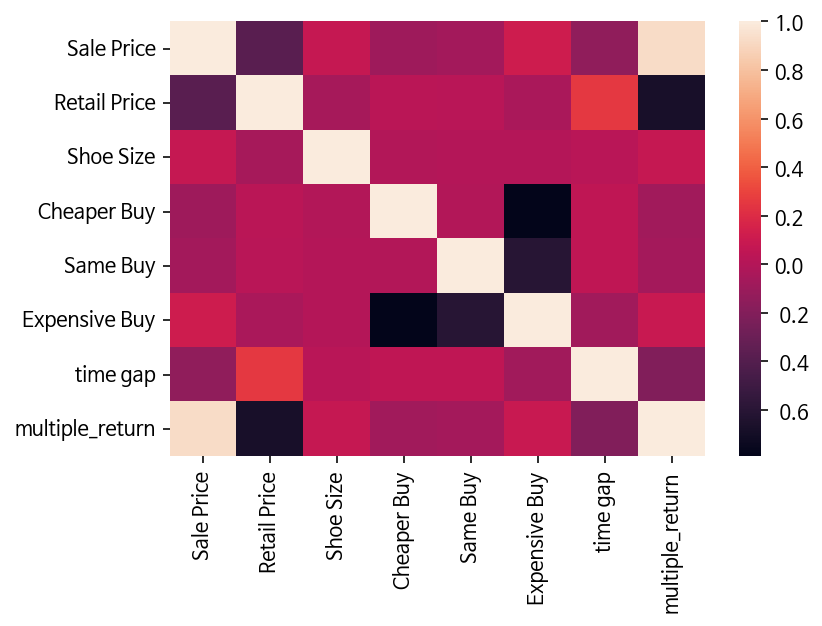

In [ ]:
correlations = df.corr()
print(correlations)
sns.heatmap(correlations)

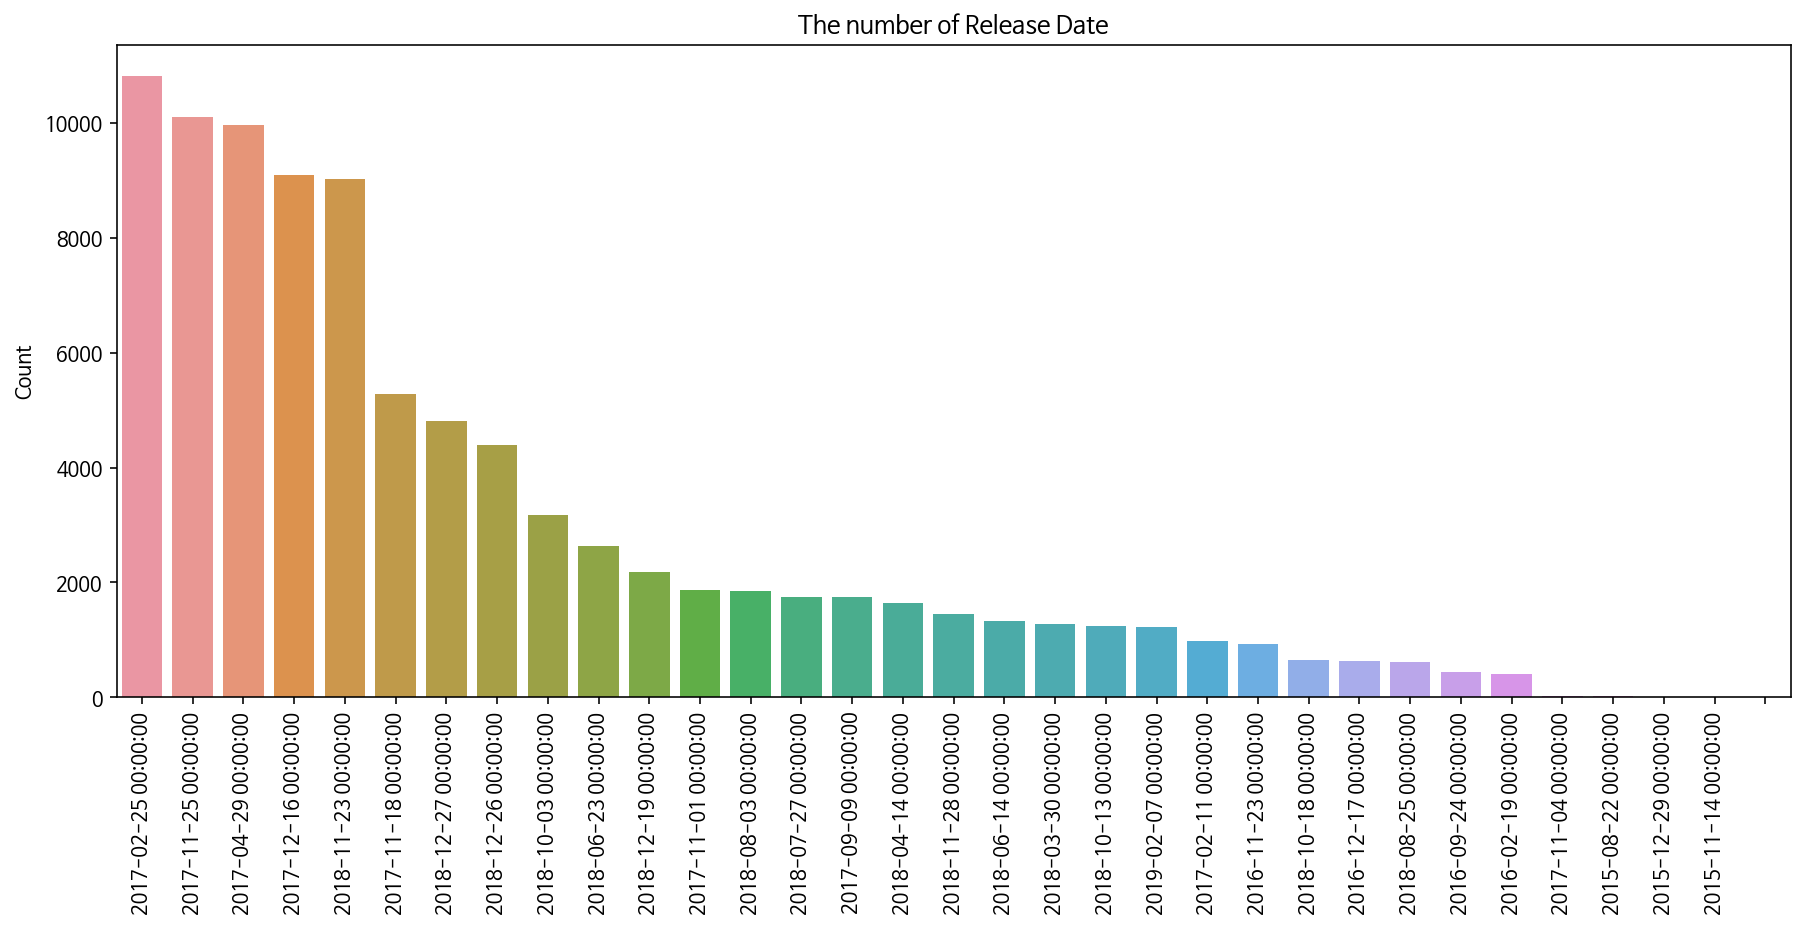

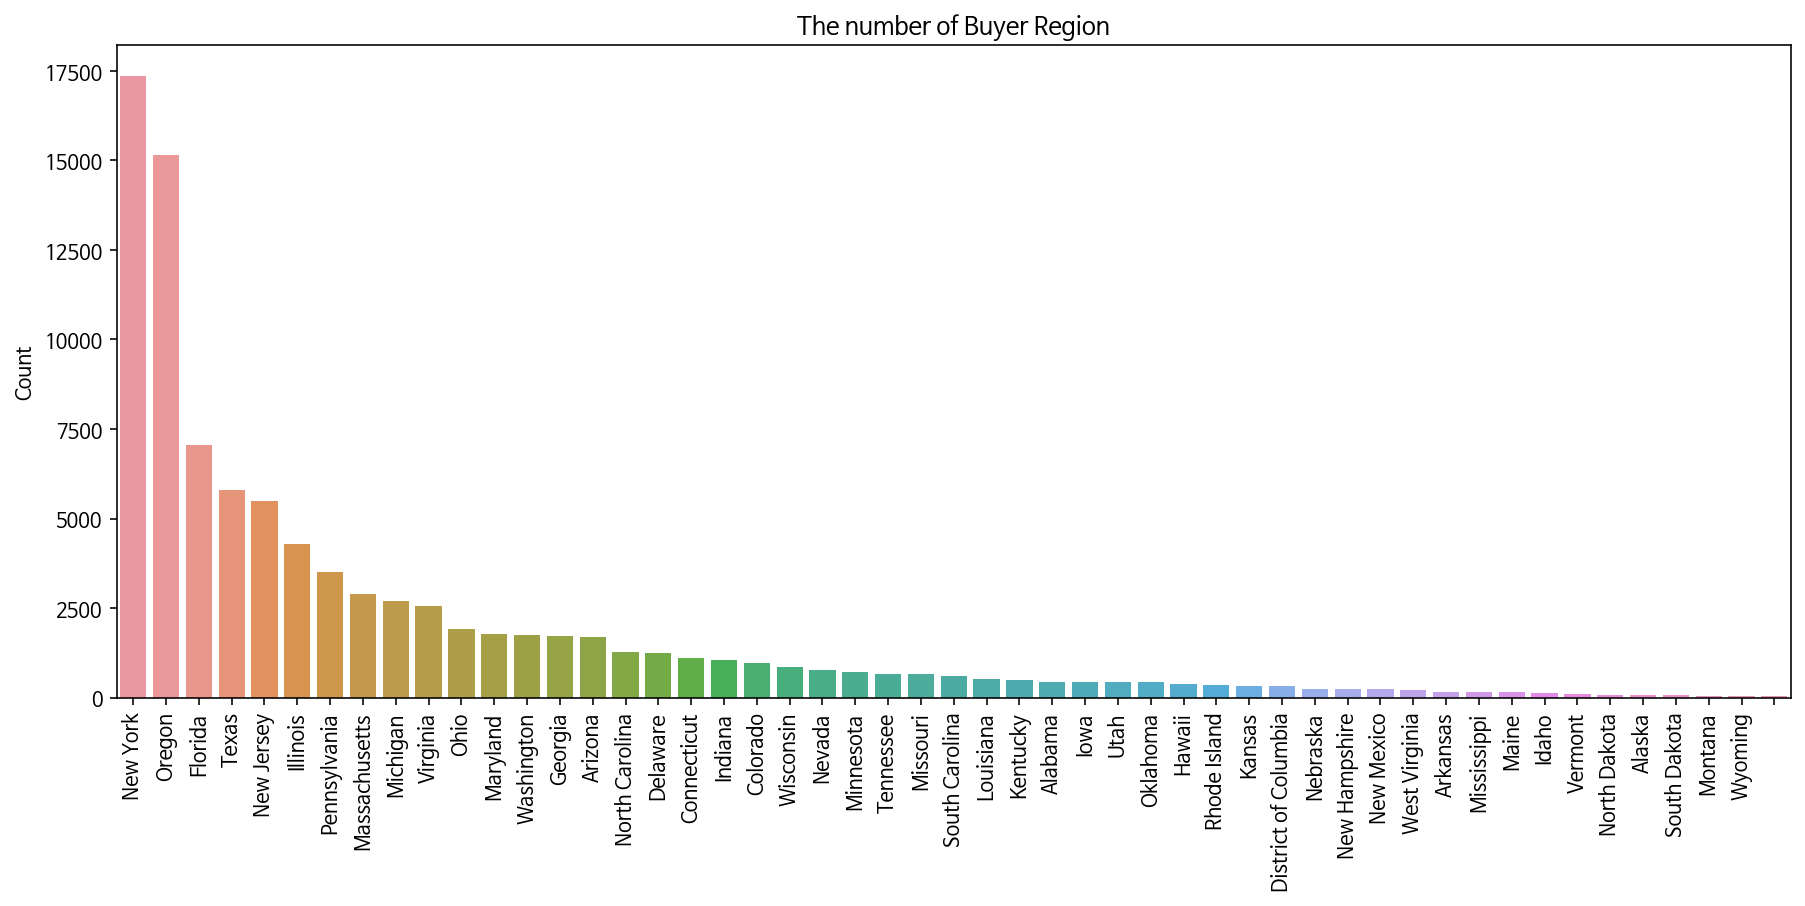

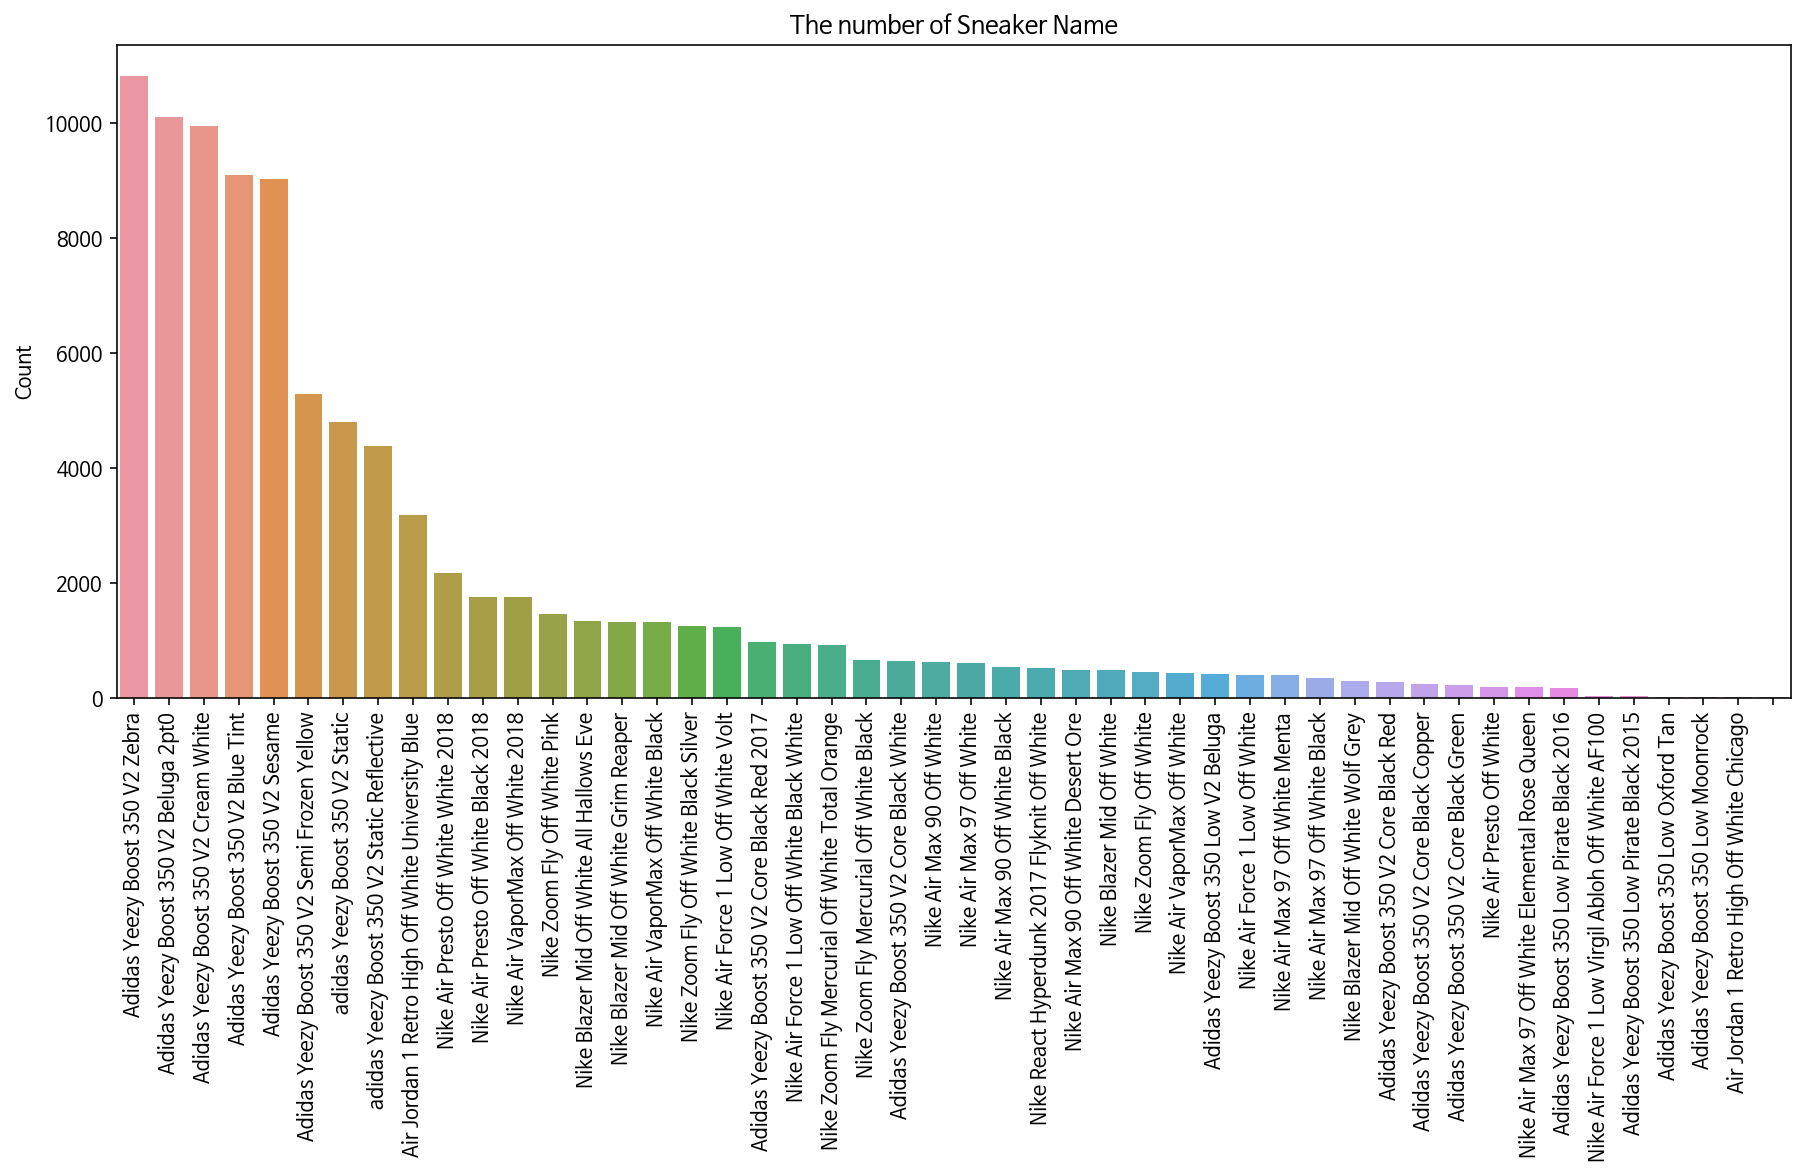

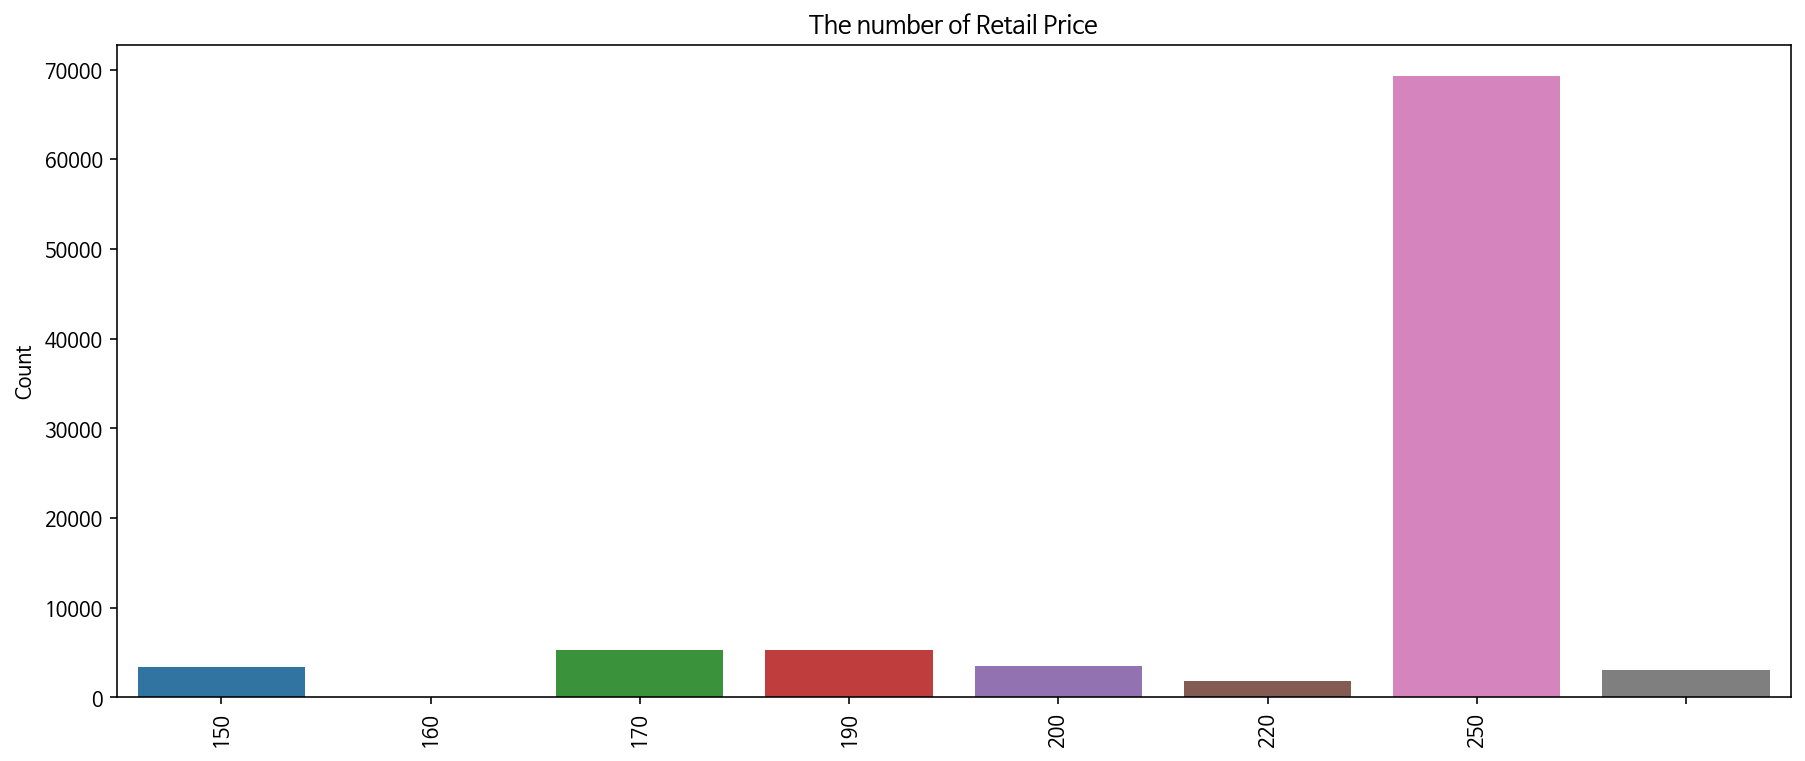

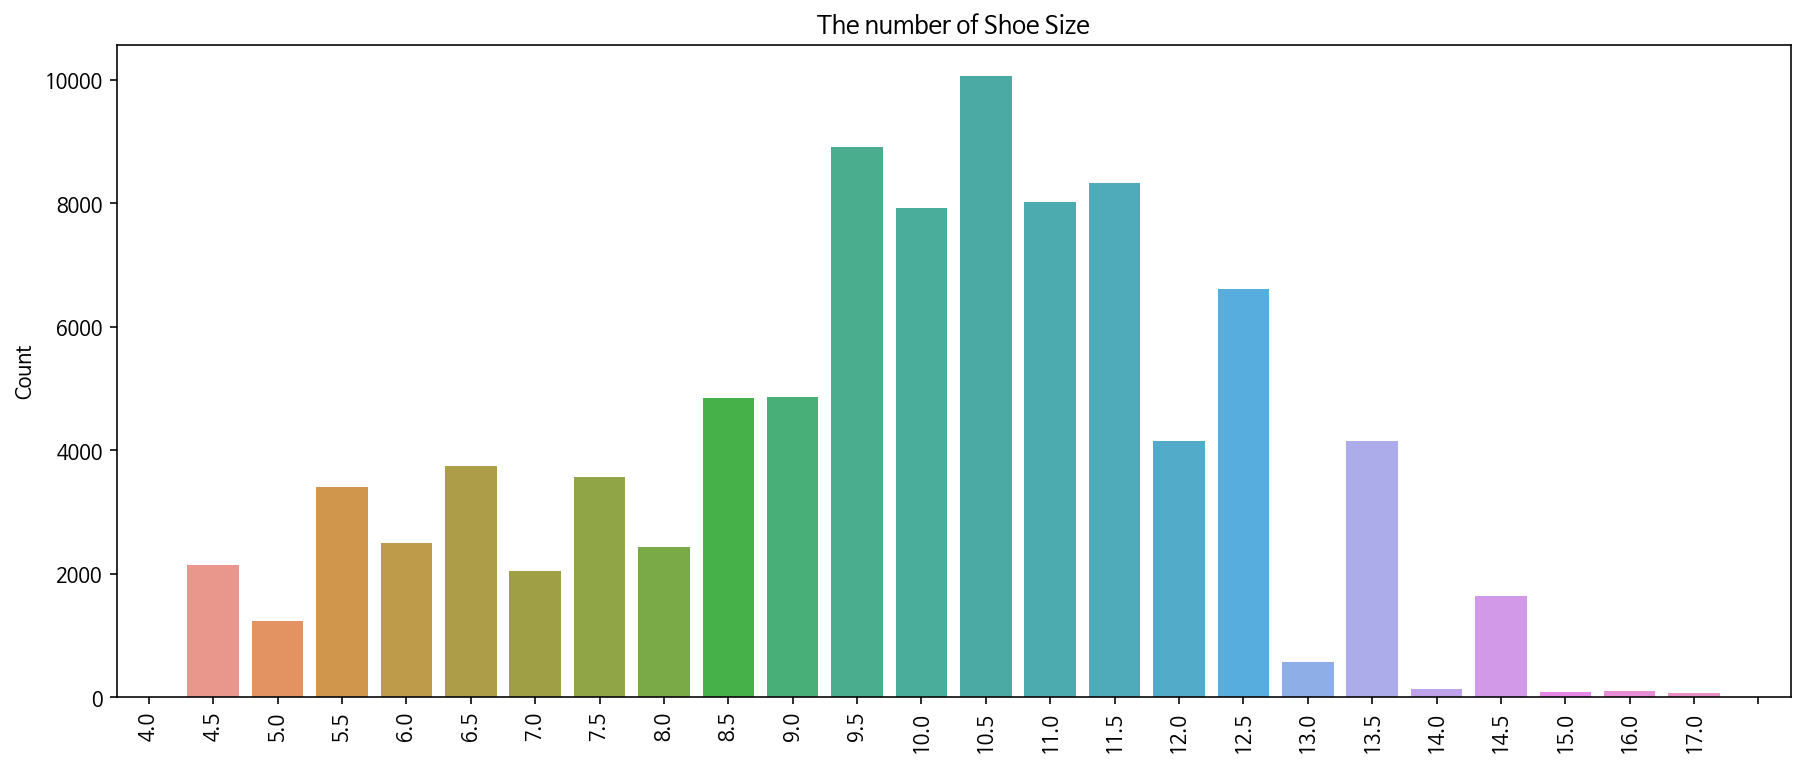

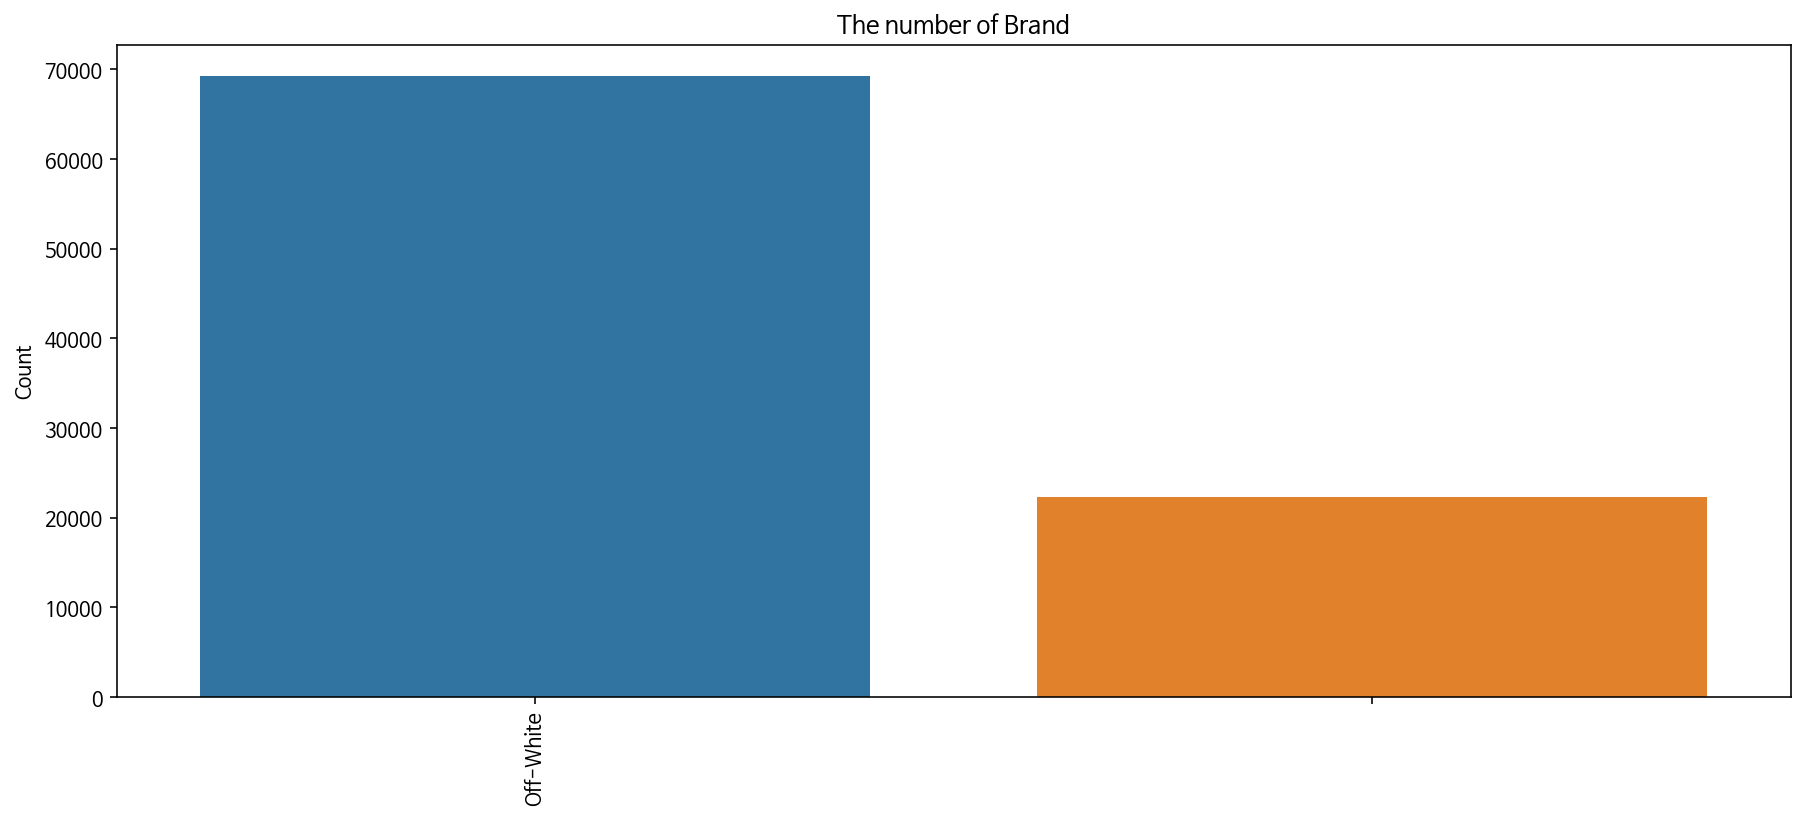

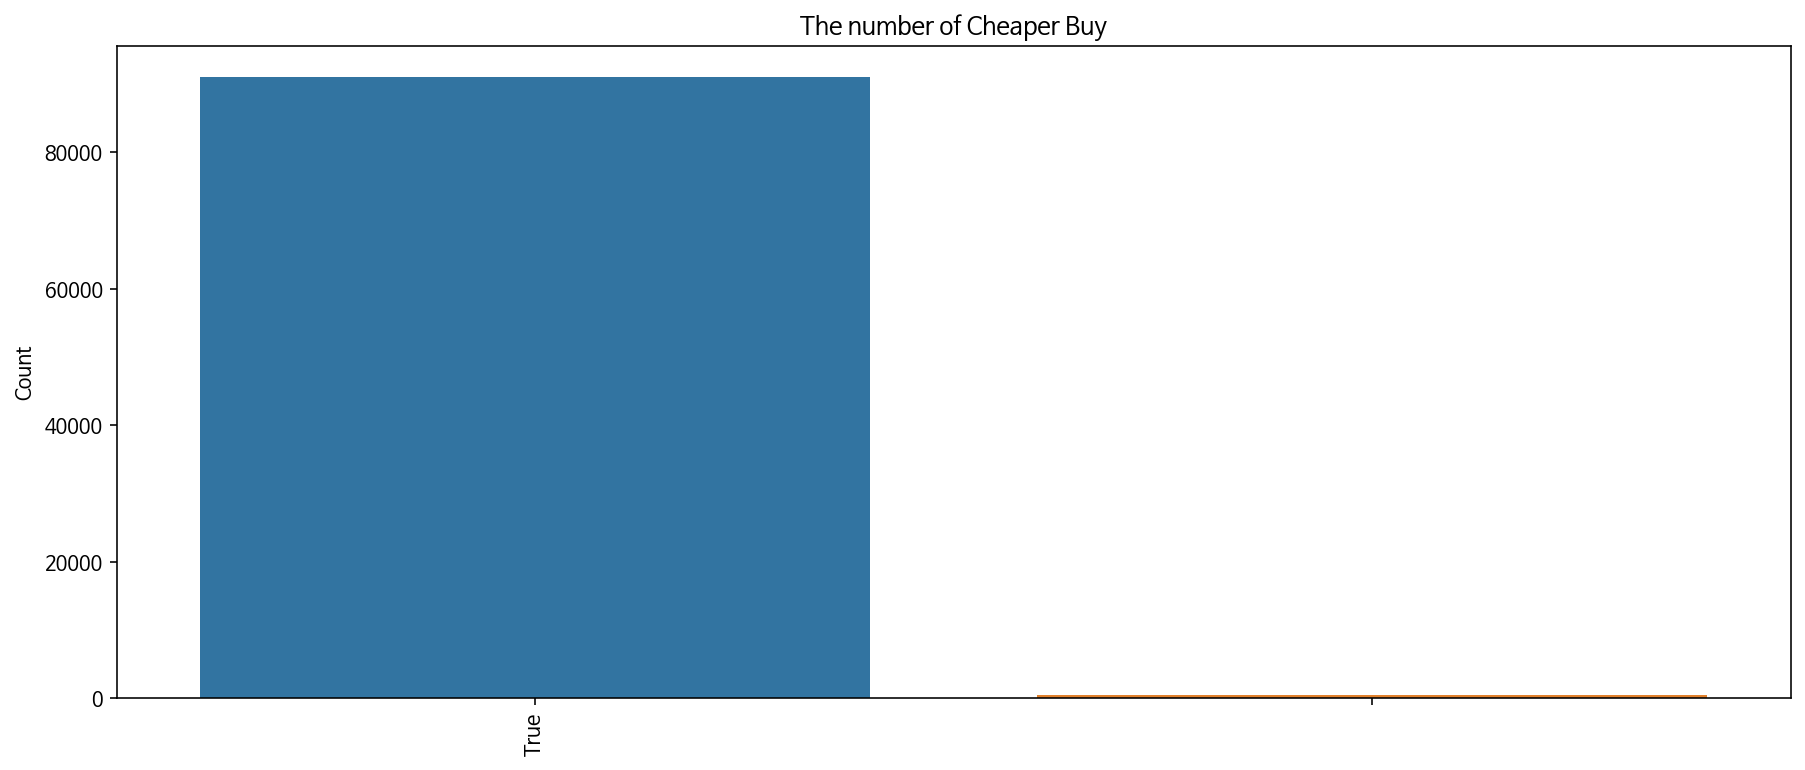

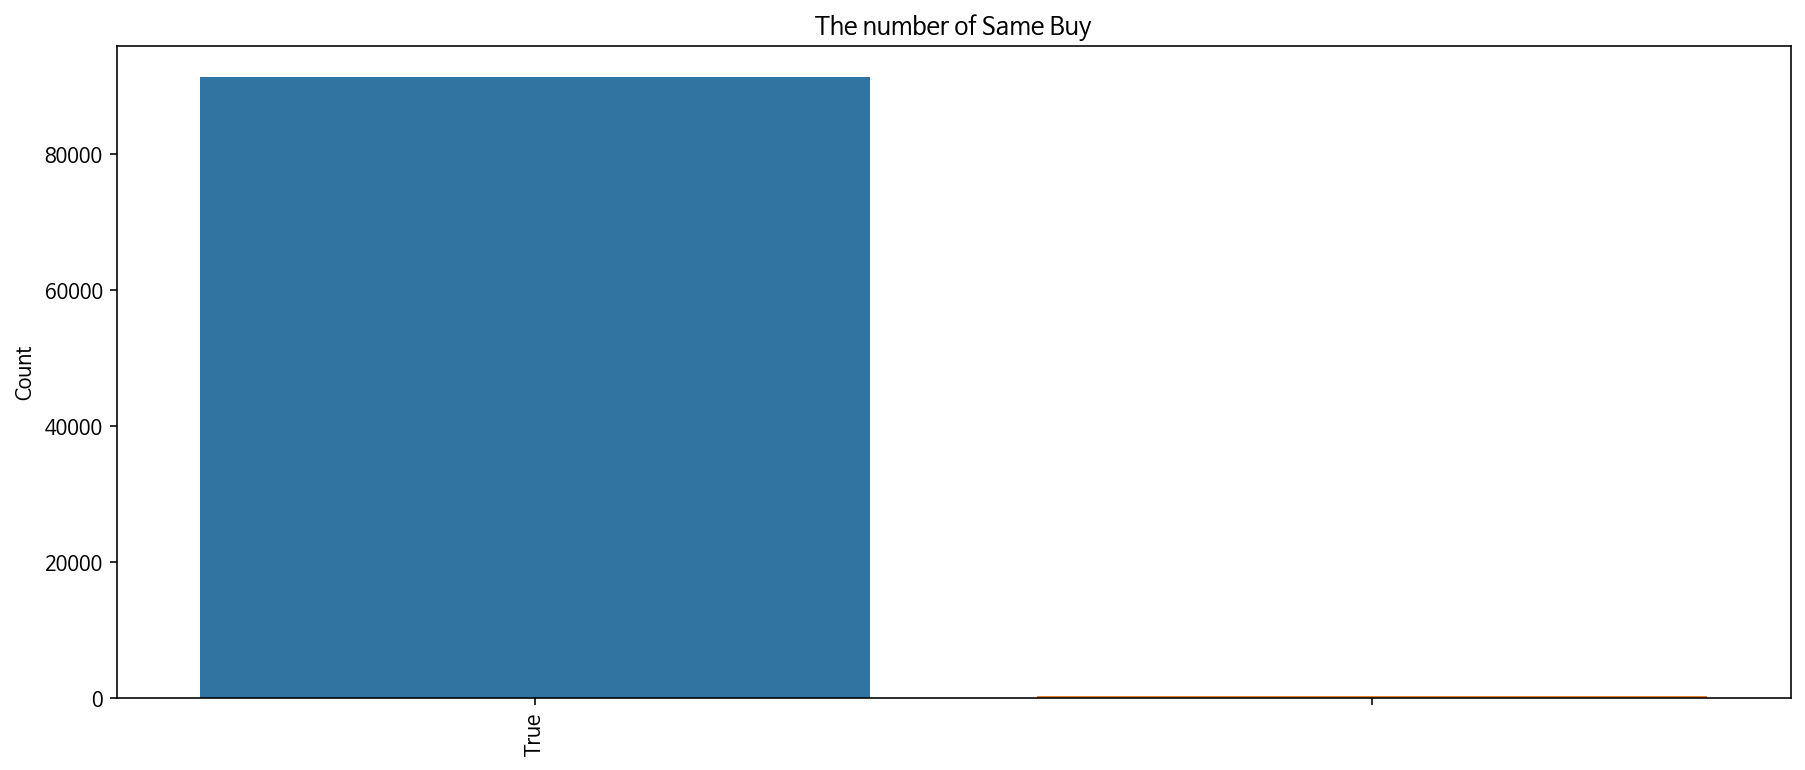

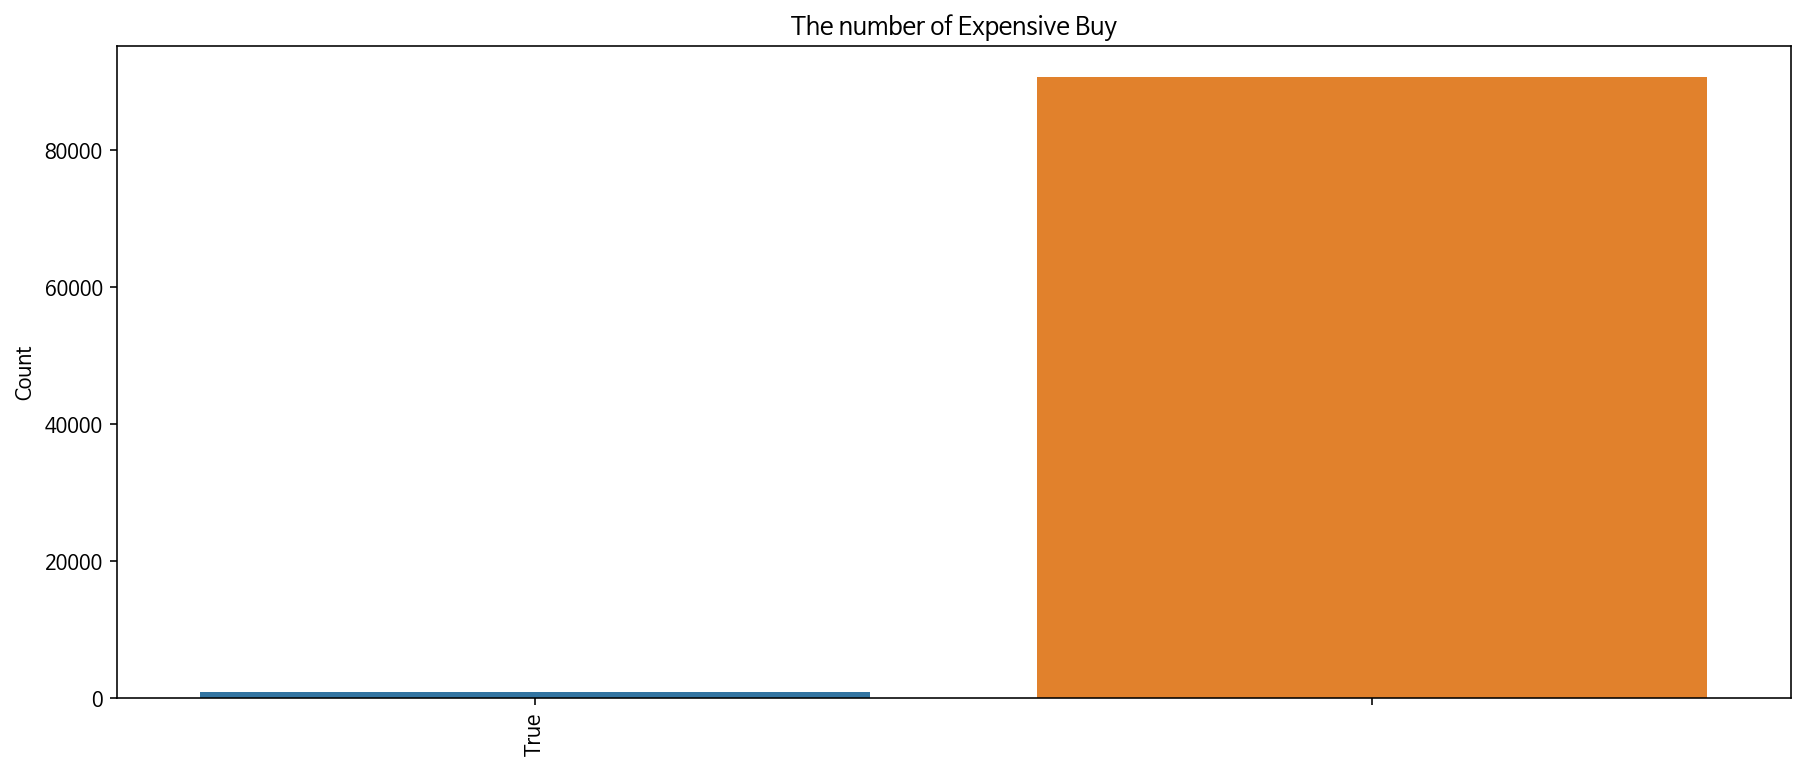

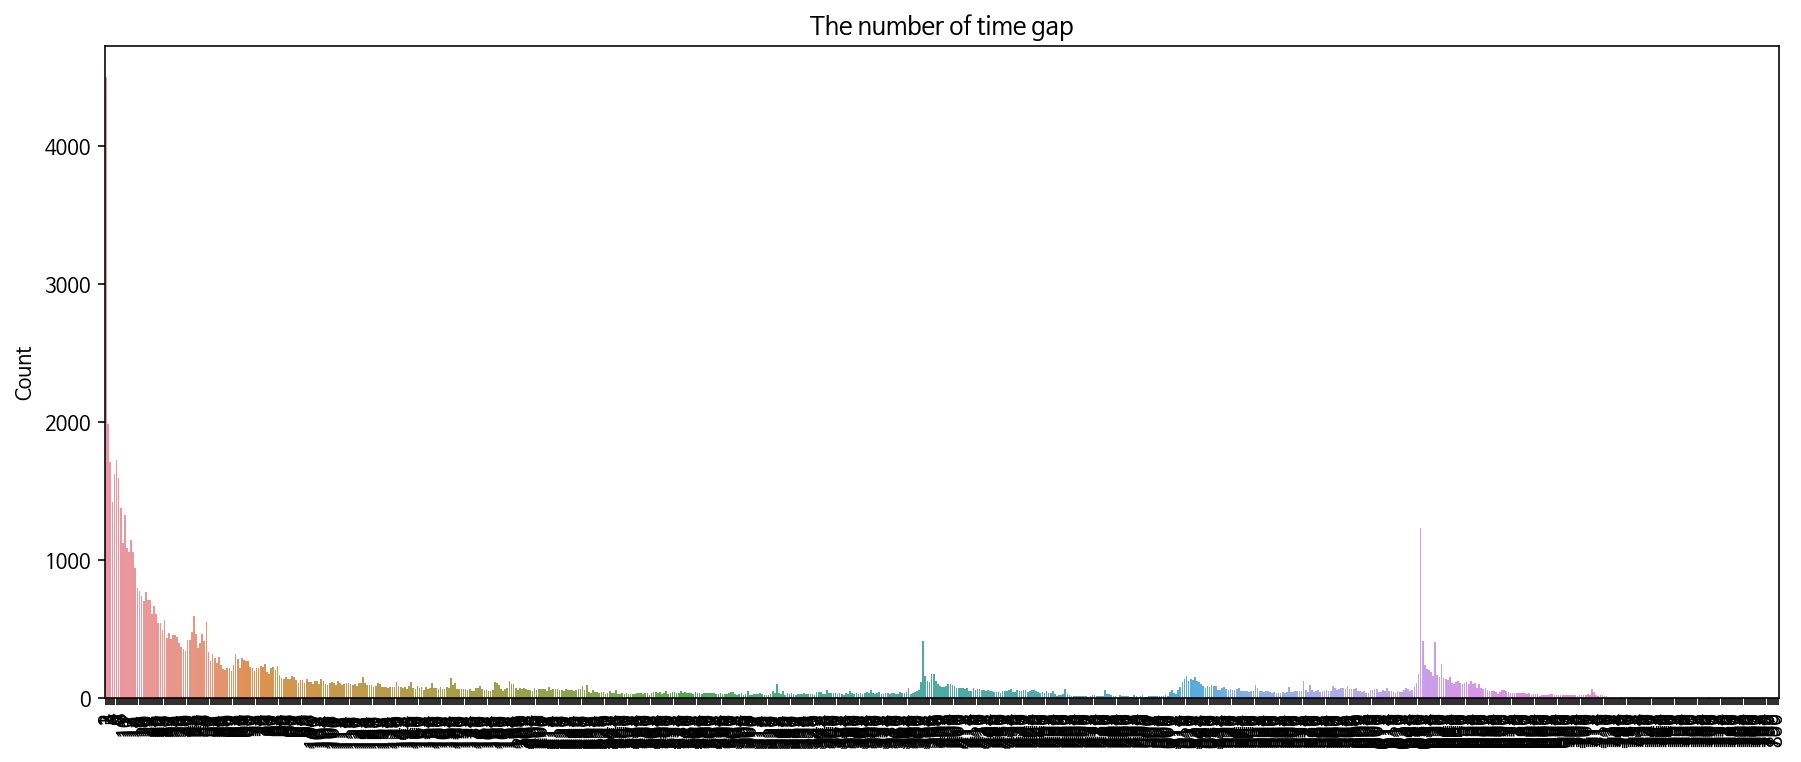

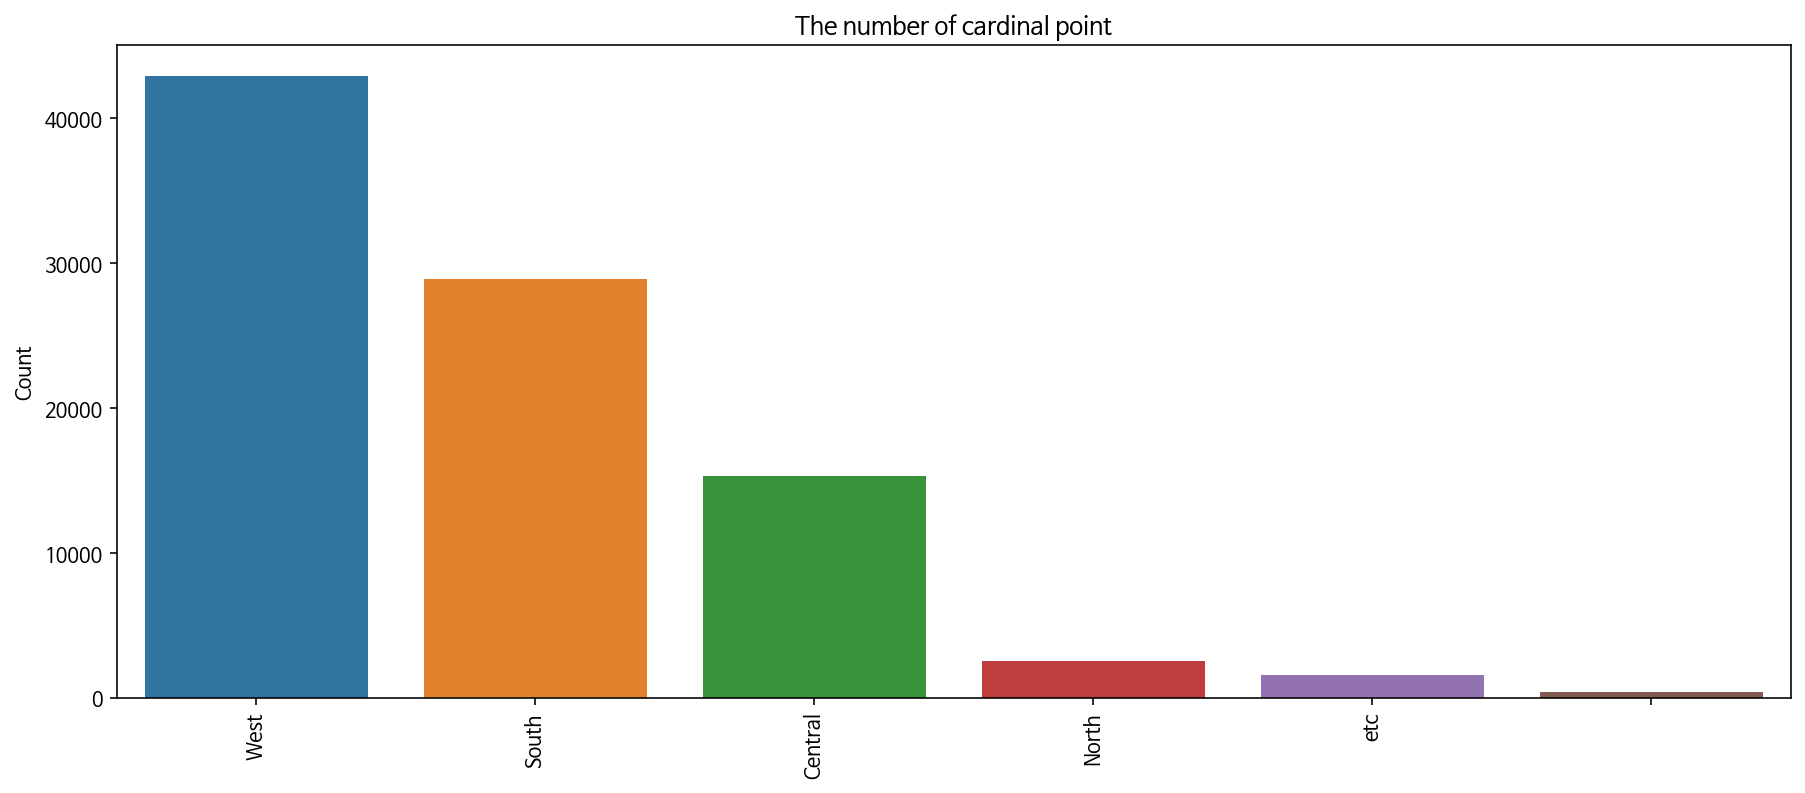

In [ ]:
df_cate = ['Release Date','Buyer Region','Sneaker Name',
          'Retail Price','Shoe Size','Brand','Cheaper Buy','Same Buy',
          'Expensive Buy','time gap','cardinal point']

for cate in df_cate:
  cate_num = df[str(cate)].value_counts()
  plt.figure(figsize=(15,6))
  chart = sns.barplot(x = cate_num.index, y=cate_num)
  chart.set_title(f"The number of {cate}")
  plt.ylabel("Count")
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
  plt.show(15)

# EDA

In [ ]:
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return',
       'Sliced Name'],
      dtype='object')

In [ ]:
bruh = df[['Sneaker Name' ,'Sale Price','Retail Price','Shoe Size','Brand','cardinal point','time gap']]
bruh.head()

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Brand,cardinal point,time gap
0,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11.0,Yeezy,West,282
1,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11.0,Yeezy,West,282
2,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,11.0,Yeezy,East,202
3,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,8.5,Yeezy,East,202
4,Adidas Yeezy Boost 350 V2 Core Black White,784,220,11.0,Yeezy,West,258


## 상품별 평균 가격

In [ ]:
sneakernames = ['adidas Yeezy Boost 350 V2 Butter',
       'Adidas Yeezy Boost 350 V2 Beluga 2pt0',
       'Adidas Yeezy Boost 350 V2 Zebra',
       'Adidas Yeezy Boost 350 V2 Blue Tint',
       'Adidas Yeezy Boost 350 V2 Cream White',
       'Adidas Yeezy Boost 350 V2 Sesame', 'adidas Yeezy Boost 350 V2 Static',
       'Adidas Yeezy Boost 350 V2 Semi Frozen Yellow',
       'Air Jordan 1 Retro High Off White University Blue',
       'adidas Yeezy Boost 350 V2 Static Reflective',
       'Nike Air Presto Off White Black 2018',
       'Nike Air Presto Off White White 2018',
       'Nike Air VaporMax Off White 2018',
       'Nike Blazer Mid Off White All Hallows Eve',
       'Nike Blazer Mid Off White Grim Reaper', 'Nike Zoom Fly Off White Pink',
       'Nike Air VaporMax Off White Black',
       'Nike Zoom Fly Off White Black Silver',
       'Nike Air Force 1 Low Off White Volt',
       'Adidas Yeezy Boost 350 V2 Core Black Red 2017',
       'Nike Air Force 1 Low Off White Black White',
       'Air Jordan 1 Retro High Off White Chicago',
       'Nike Air Max 90 Off White Black',
       'Nike Zoom Fly Mercurial Off White Total Orange',
       'Nike Air Max 90 Off White Desert Ore',
       'Nike Zoom Fly Mercurial Off White Black', 'Nike Air Max 90 Off White',
       'Adidas Yeezy Boost 350 V2 Core Black White',
       'Nike Air Presto Off White', 'Nike Air Max 97 Off White',
       'Nike Air VaporMax Off White', 'Nike Blazer Mid Off White',
       'Adidas Yeezy Boost 350 Low V2 Beluga',
       'Nike React Hyperdunk 2017 Flyknit Off White',
       'Nike Air Force 1 Low Off White', 'Nike Zoom Fly Off White',
       'Nike Air Max 97 Off White Menta',
       'Air Jordan 1 Retro High Off White White',
       'Adidas Yeezy Boost 350 V2 Core Black Red',
       'Nike Air Max 97 Off White Black',
       'Nike Blazer Mid Off White Wolf Grey',
       'Adidas Yeezy Boost 350 V2 Core Black Copper',
       'Nike Air Max 97 Off White Elemental Rose Queen',
       'Adidas Yeezy Boost 350 V2 Core Black Green',
       'Adidas Yeezy Boost 350 Low Pirate Black 2016',
       'Adidas Yeezy Boost 350 Low Moonrock',
       'Adidas Yeezy Boost 350 Low Pirate Black 2015',
       'Adidas Yeezy Boost 350 Low Oxford Tan',
       'Adidas Yeezy Boost 350 Low Turtledove',
       'Nike Air Force 1 Low Virgil Abloh Off White AF100'
       ]

In [ ]:
avgs_price=[]

for name in sneakernames:
  shoerow = bruh.loc[bruh['Sneaker Name']==name]
  avgs_price.append(shoerow.mean()[0])

AvgPrice = pd.Series(avgs_price)
SneakerName = pd.Series(sneakernames)

avgprice_df = pd.DataFrame(columns=['Sneaker_Name','Average_Price'])
avgprice_df['Sneaker_Name'] = SneakerName
avgprice_df['Average_Price'] = AvgPrice

avgprice_df.head()

,Sneaker_Name,Average_Price
0,adidas Yeezy Boost 350 V2 Butter,266.683213
1,Adidas Yeezy Boost 350 V2 Beluga 2pt0,396.413838
2,Adidas Yeezy Boost 350 V2 Zebra,361.272206
3,Adidas Yeezy Boost 350 V2 Blue Tint,378.082225
4,Adidas Yeezy Boost 350 V2 Cream White,288.708805


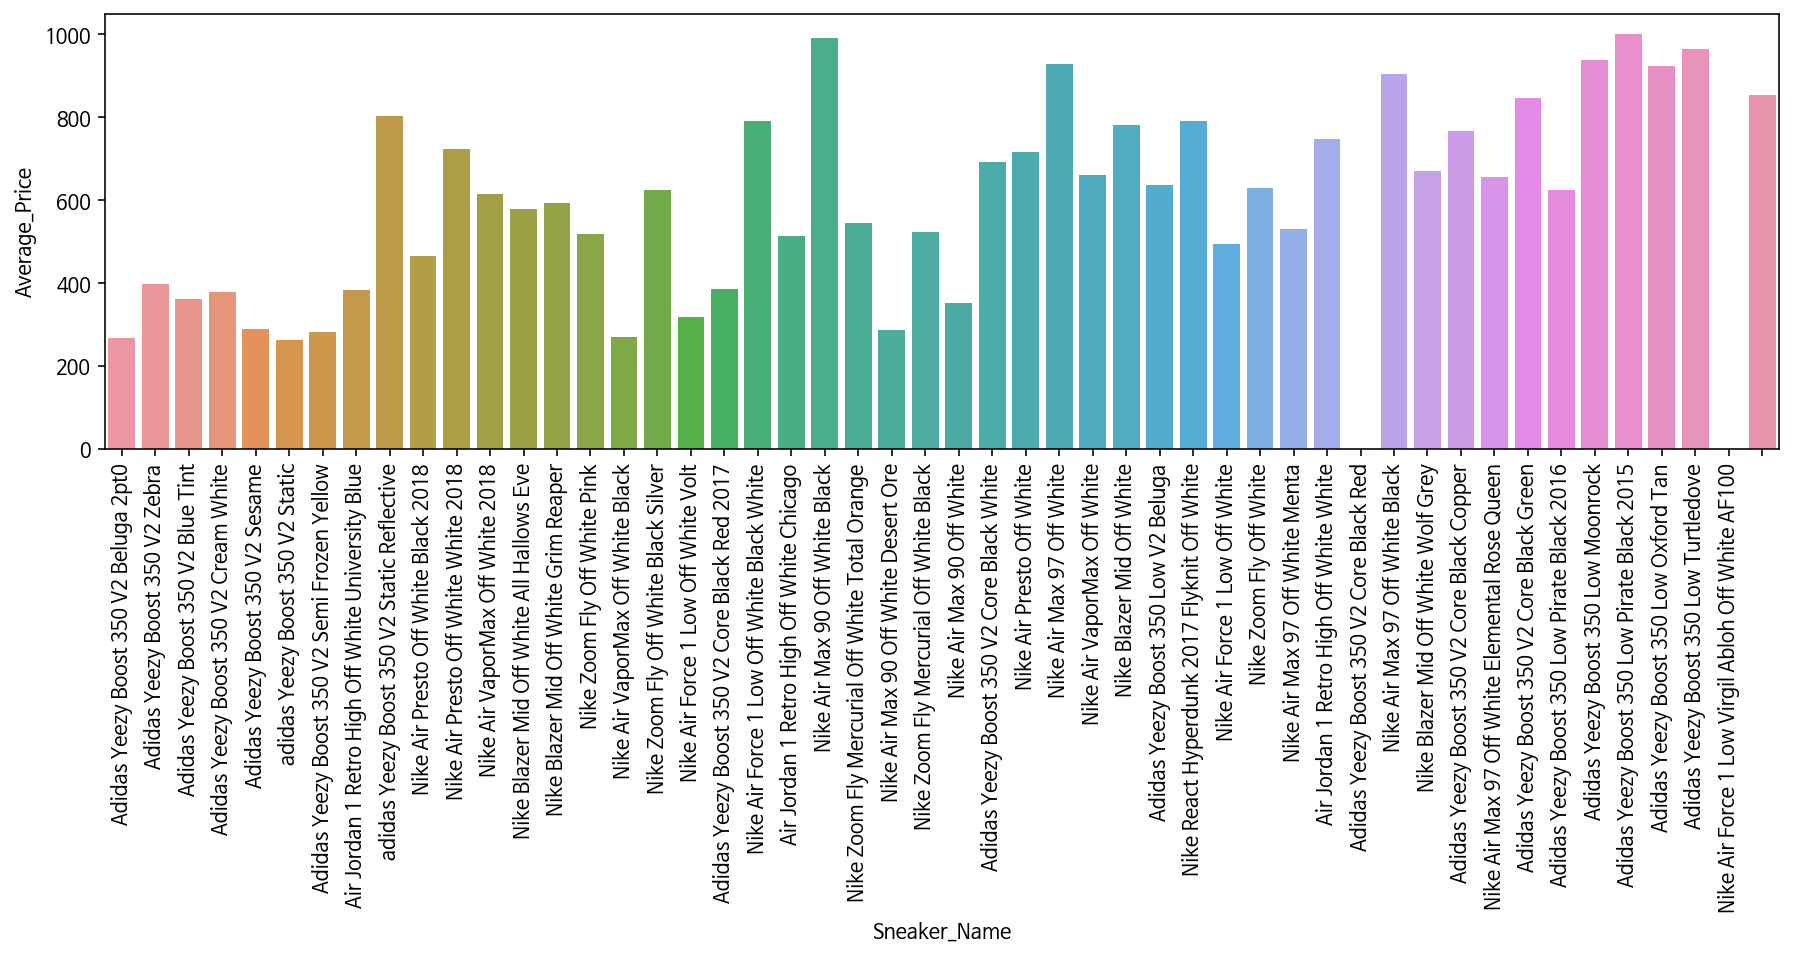

In [ ]:
fig_dims = (15,4)
fig,ax = plt.subplots(figsize = fig_dims)
chart = sns.barplot(x = avgprice_df['Sneaker_Name'], y=avgprice_df['Average_Price'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

## 브랜드별 평균 가격

### 2017~2019 StockX (Train data)

In [ ]:
bruh['Sneaker Name'] = bruh['Sneaker Name'].apply(lambda x: x.replace('adidas','Adidas'))
bruh['split'] = bruh['Sneaker Name'].apply(lambda x: x.split(' '))
brand_new = []
for i in range(len(bruh['split'])):
  if 'Adidas' in bruh['split'][i]:
    brand_new.append('Adidas')
  elif 'Nike' in bruh['split'][i]:
    brand_new.append('Nike')
  elif 'Jordan' in bruh['split'][i]:
    brand_new.append('Jordan')

bruh['Brand'] = brand_new
bruh = bruh.drop('split',axis=1)
bruh.head()

,Sneaker Name,Sale Price,Retail Price,Shoe Size,Brand,cardinal point,time gap
0,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,11.0,Adidas,West,282
1,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,11.0,Adidas,West,282
2,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,11.0,Adidas,East,202
3,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,8.5,Adidas,East,202
4,Adidas Yeezy Boost 350 V2 Core Black White,784,220,11.0,Adidas,West,258


Adidas average price : $353.28518443687585
Nike average price : $548.177461848188
Jordan average price : $802.3665137614679


Text(0, 0.5, 'Mean Price')

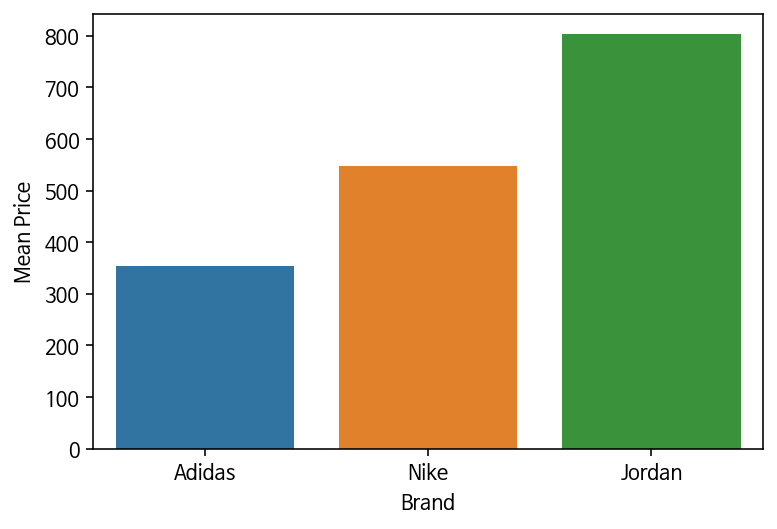

In [ ]:
avgs_price2 =[]
target_df = bruh[['Brand','Sale Price']]
brands = ['Adidas','Nike','Jordan']

for brands_index in range(len(brands)):
  brandrow = target_df.loc[target_df['Brand'] == str(brands[brands_index])]
  avgs_price2.append(brandrow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{brands[i]} average price : $' + str(avgs_price2[i]))

chart = sns.barplot(x = brands, y= avgs_price2)
chart.set_xlabel("Brand")
chart.set_ylabel("Mean Price")

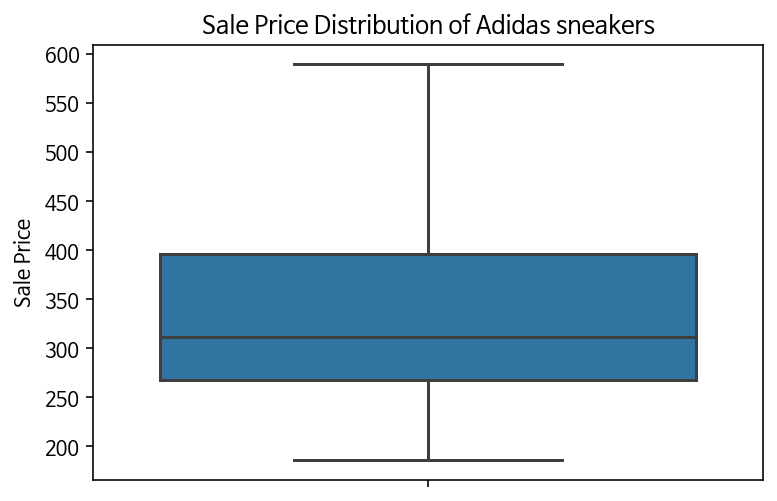

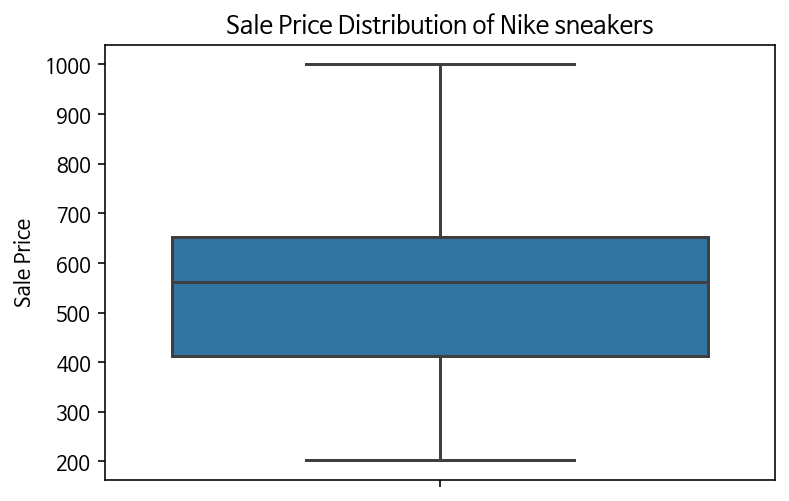

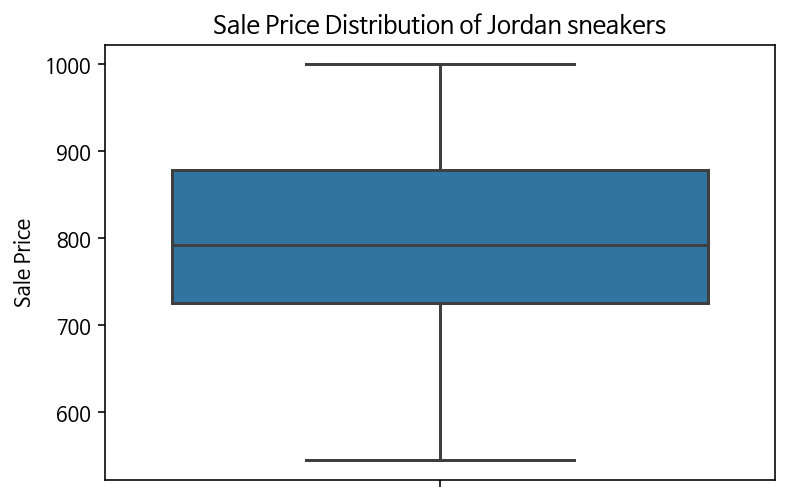

In [ ]:
for brand in brands:
  brandrow = target_df.loc[target_df['Brand']==brand]
  chart = sns.boxplot(y=brandrow['Sale Price'],showfliers = False) # 이상치 안보여줌
  chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
  plt.show()
  

Text(0, 0.5, 'Count')

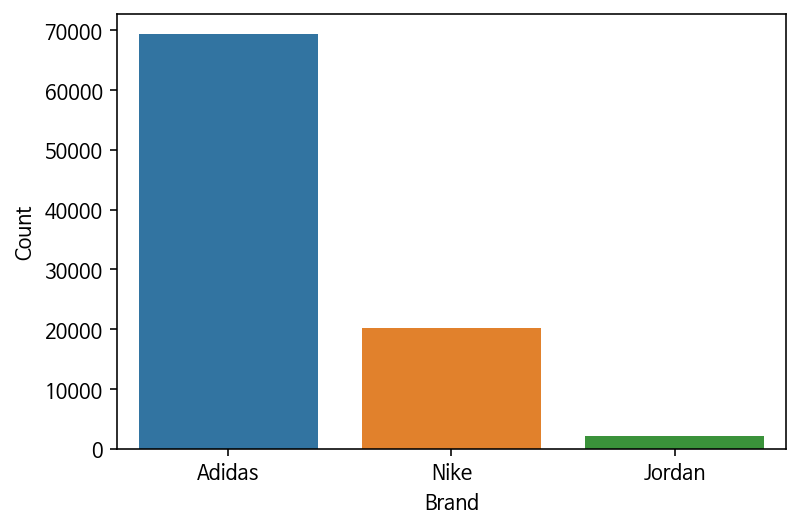

In [ ]:
brand_vc = target_df['Brand'].value_counts()
chart = sns.barplot(x = brand_vc.index, y=brand_vc)
chart.set_xlabel("Brand")
chart.set_ylabel("Count")

### 2022 StockX (Test data)

In [ ]:
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격,time gap,Sliced Name
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188,7,Adidas Yeezy Foam
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209,4,Jordan 1 Retro
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333,0,Jordan 4 Retro
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566,5,NikeCraft General Purpose
5,adidas Yeezy Boost 700 MNVN Laceless Phosphor,Adidas,220,2022-06-13,217,2,Adidas Yeezy Boost


In [ ]:
test_df2 = test_df2.rename(columns = {
    'Sneaker_Name' : 'Sneaker Name',
    'retail Price' : 'Retail Price',
    '평균신발가격' : 'Sale Price'
})
test_df2.head()

,Sneaker Name,Brand,Retail Price,Release Date,Sale Price,time gap,Sliced Name
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188,7,Adidas Yeezy Foam
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209,4,Jordan 1 Retro
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333,0,Jordan 4 Retro
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566,5,NikeCraft General Purpose
5,adidas Yeezy Boost 700 MNVN Laceless Phosphor,Adidas,220,2022-06-13,217,2,Adidas Yeezy Boost


Adidas average price : $226.52592592592592
Nike average price : $183.28971962616822
Jordan average price : $233.56


Text(0, 0.5, 'Mean Price')

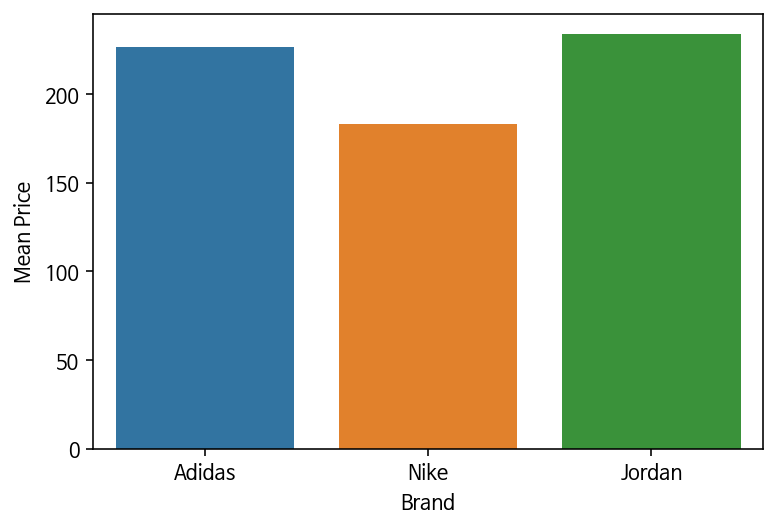

In [ ]:
avgs_price2 =[]
target_df = test_df2[['Brand','Sale Price']]
brands = ['Adidas','Nike','Jordan']

for brands_index in range(len(brands)):
  brandrow = target_df.loc[target_df['Brand'] == str(brands[brands_index])]
  avgs_price2.append(brandrow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{brands[i]} average price : $' + str(avgs_price2[i]))

chart = sns.barplot(x = brands, y= avgs_price2)
chart.set_xlabel("Brand")
chart.set_ylabel("Mean Price")

Text(0, 0.5, 'Count')

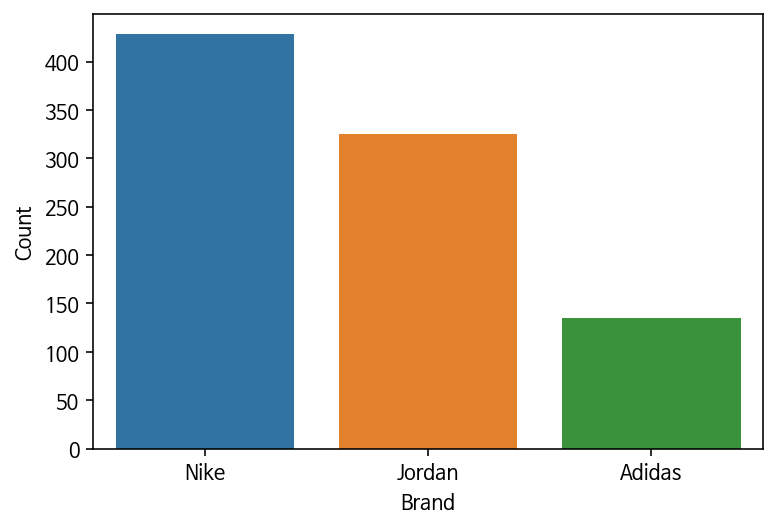

In [ ]:
brand_vc = target_df['Brand'].value_counts()[:3]
chart = sns.barplot(x = brand_vc.index, y=brand_vc)
chart.set_xlabel("Brand")
chart.set_ylabel("Count")

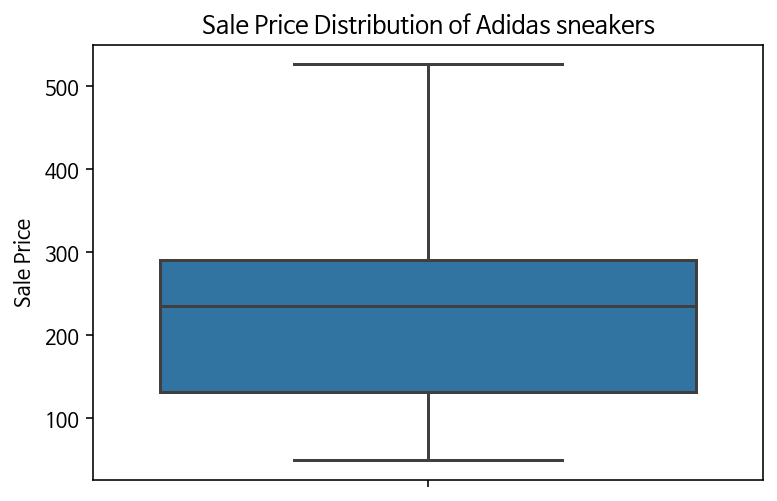

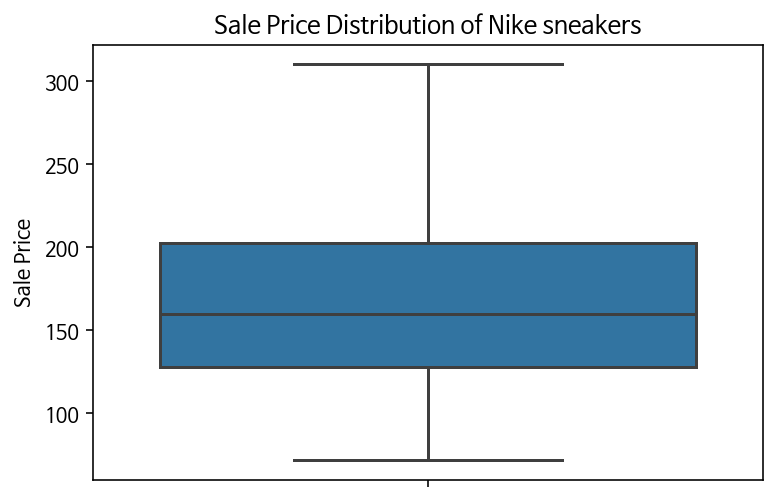

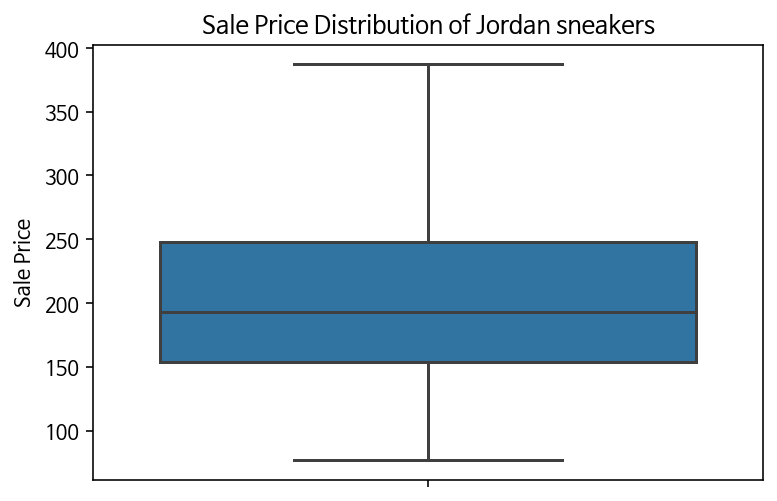

In [ ]:
for brand in brands:
  brandrow = target_df.loc[target_df['Brand']==brand]
  chart = sns.boxplot(y=brandrow['Sale Price'],showfliers = False) # 이상치 안보여줌
  chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
  plt.show()
  

### 2022 Kream (Non click)

In [ ]:
kream_nonclick = Average_df.copy()
kream_nonclick['평균구매가'] = kream_nonclick['평균구매가']/1300
kream_nonclick.head()

,브랜드,평균구매가,평균거래량,평균저장수,평균피드수
0,Nike,193.693294,8527.108974,11373.153846,11373.153846
1,Jordan,270.823212,6921.929825,11668.412281,11668.412281
2,New Balance,169.615385,8890.000000,7021.880952,7021.880952
3,Adidas,195.307692,2853.025000,4339.425000,4339.425000


Text(0.5, 1.0, '평균구매가')

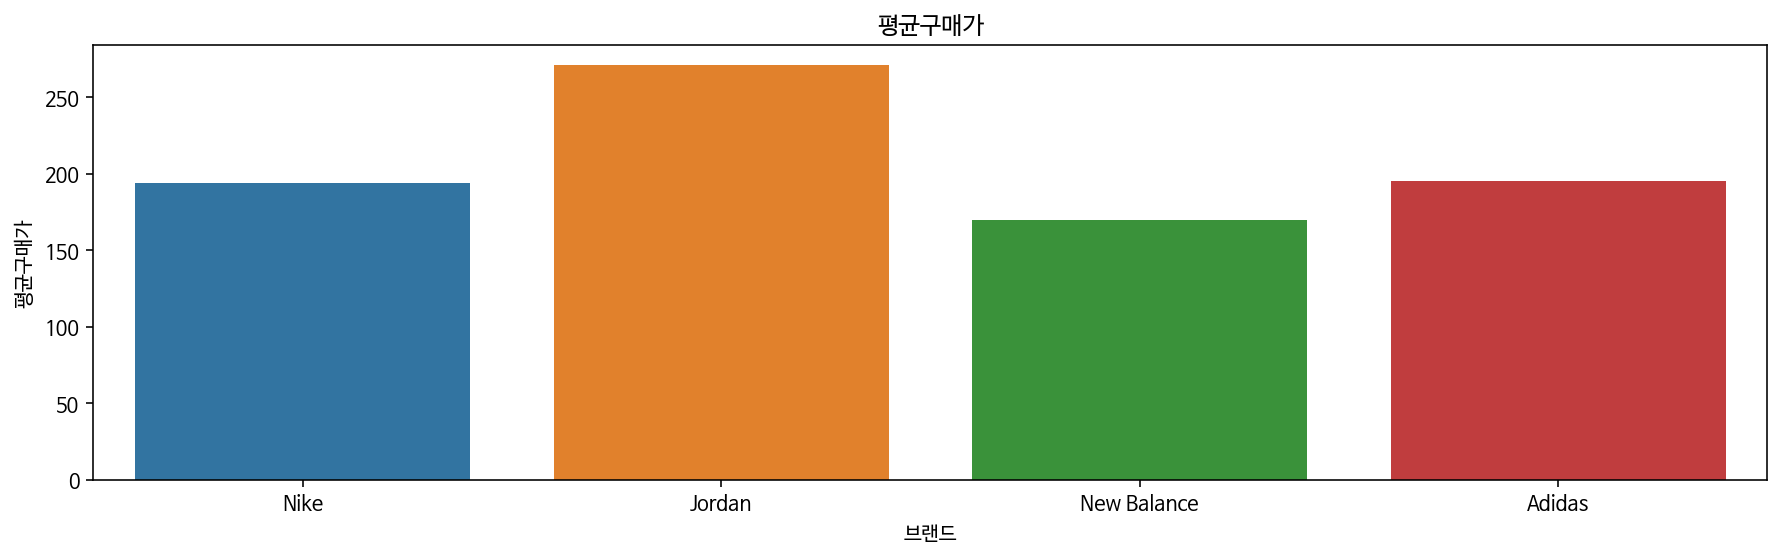

In [ ]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=kream_nonclick,x=kream_nonclick['브랜드'],y='평균구매가')
chart.set_title('평균구매가')

Text(0.5, 1.0, '평균거래량')

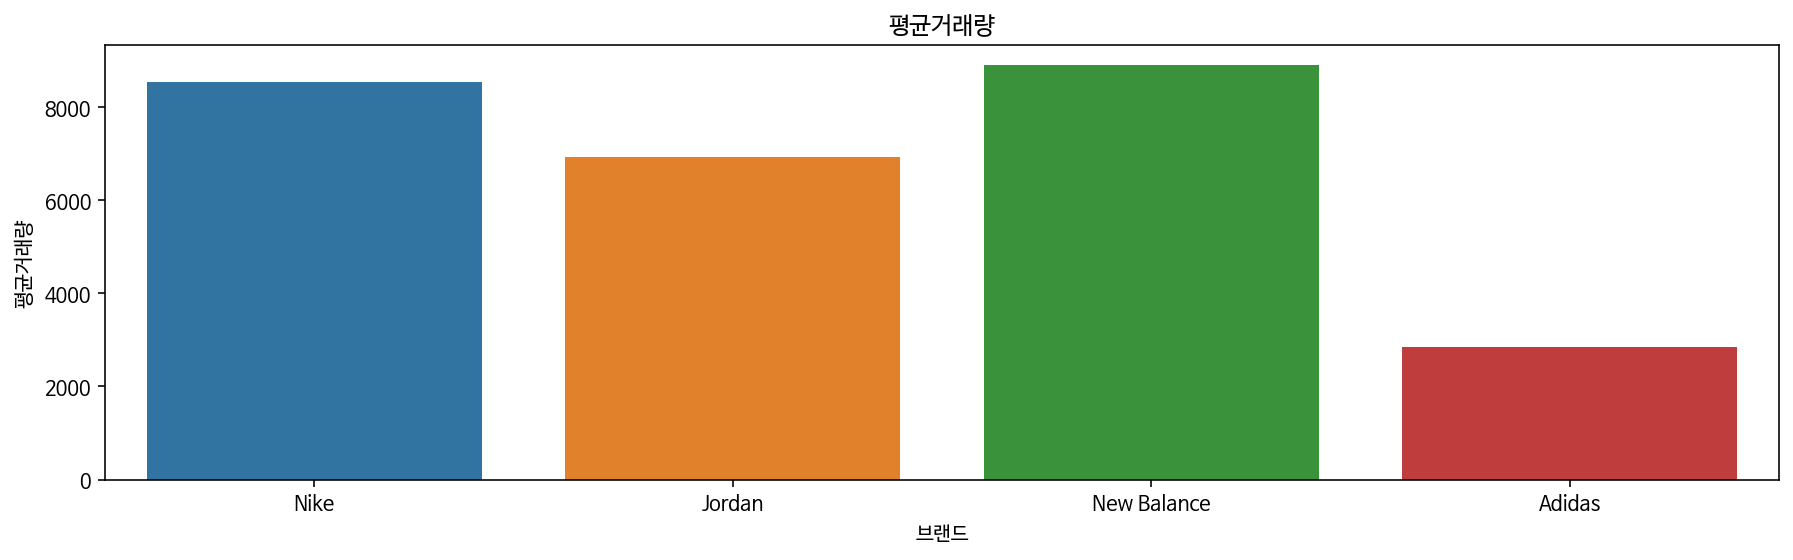

In [ ]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=kream_nonclick,x=kream_nonclick['브랜드'],y='평균거래량')
chart.set_title('평균거래량')

Text(0.5, 1.0, '평균저장수')

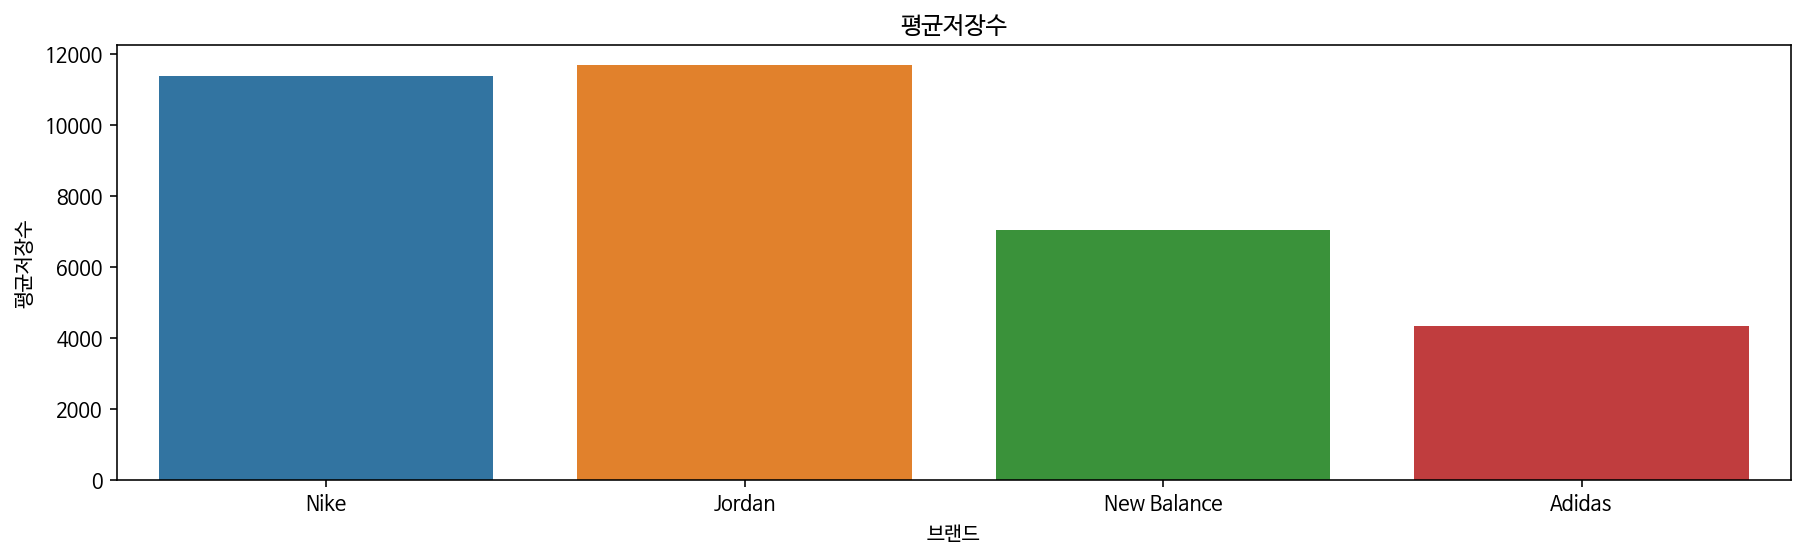

In [ ]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균저장수')
chart.set_title('평균저장수')

Text(0.5, 1.0, '평균피드수')

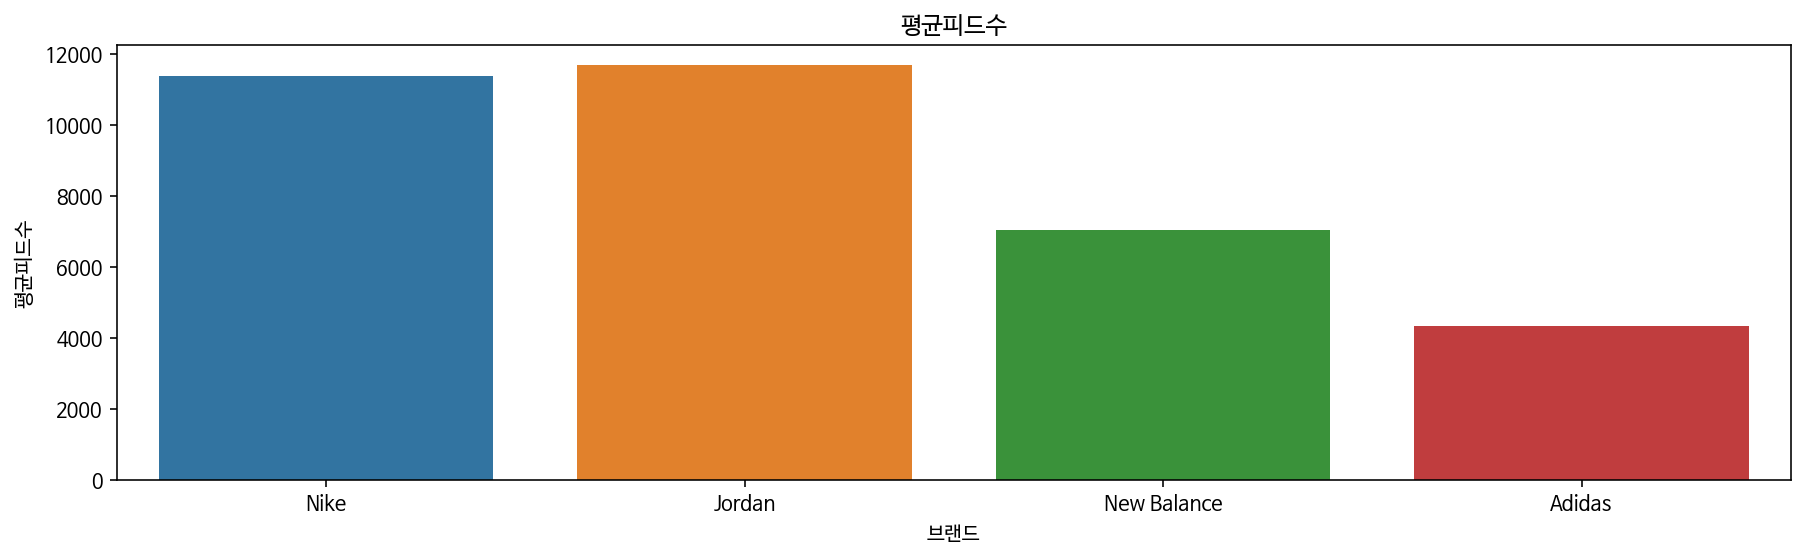

In [ ]:
plt.figure(figsize=(15,4))
chart = sns.barplot(data=Average_df,x=Average_df['브랜드'],y='평균피드수')
chart.set_title('평균피드수')

## 사이즈별 평균 가격

### 2017~2019 StockX (Train data)

10.0 average price : $427.4048305337442
9.0 average price : $408.93073641670406
11.0 average price : $431.76779925561294
10.5 average price : $408.2010463378176
9.5 average price : $404.10790005047954
12.0 average price : $415.0191929877588
8.5 average price : $395.8832716810522
8.0 average price : $411.5346391752577
11.5 average price : $399.6669076885997
13.0 average price : $423.86206896551727
6.0 average price : $393.70542635658916
7.0 average price : $393.049299719888
5.0 average price : $371.06226138032304
5.5 average price : $361.36625349860054
7.5 average price : $389.995904995905
4.0 average price : $370.39804013065793
6.5 average price : $397.17391304347825
14.0 average price : $408.468253968254
4.5 average price : $368.5264012997563
12.5 average price : $391.17098445595855
13.5 average price : $383.5874125874126
15.0 average price : $557.8828828828829
14.5 average price : $444.7831325301205
16.0 average price : $639.072463768116
3.5 average price : $503.75
17.0 average price

Text(0, 0.5, 'Mean Price')

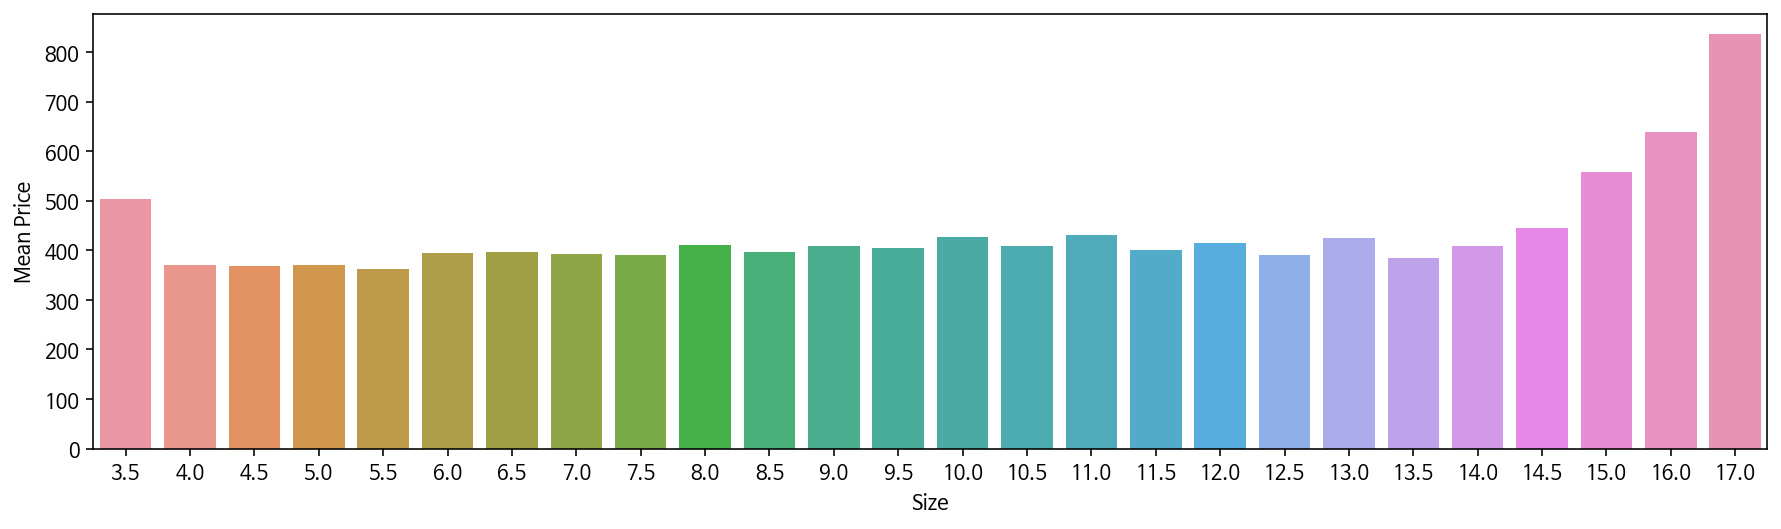

In [ ]:
avgs_price2 =[]
target_df = bruh[['Shoe Size','Sale Price']]
Shoe_size = bruh['Shoe Size'].value_counts().index.tolist()

for Shoe_size_index in range(len(Shoe_size)):
  shoerow = target_df.loc[target_df['Shoe Size'] == Shoe_size[Shoe_size_index]]
  avgs_price2.append(shoerow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{Shoe_size[i]} average price : $' + str(avgs_price2[i]))

plt.figure(figsize=(15,4))
chart = sns.barplot(x = Shoe_size, y= avgs_price2)
chart.set_xlabel('Size')
chart.set_ylabel('Mean Price')

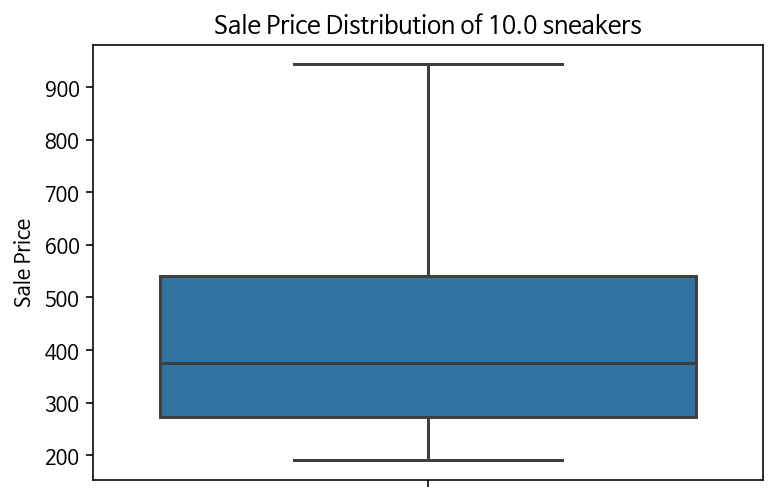

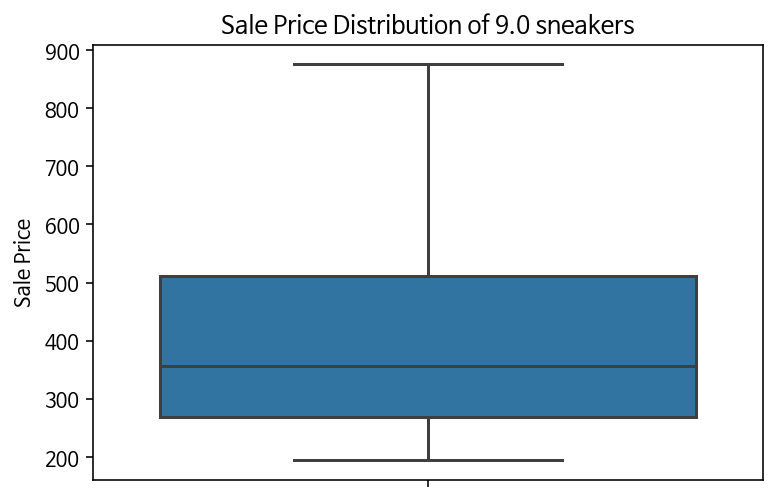

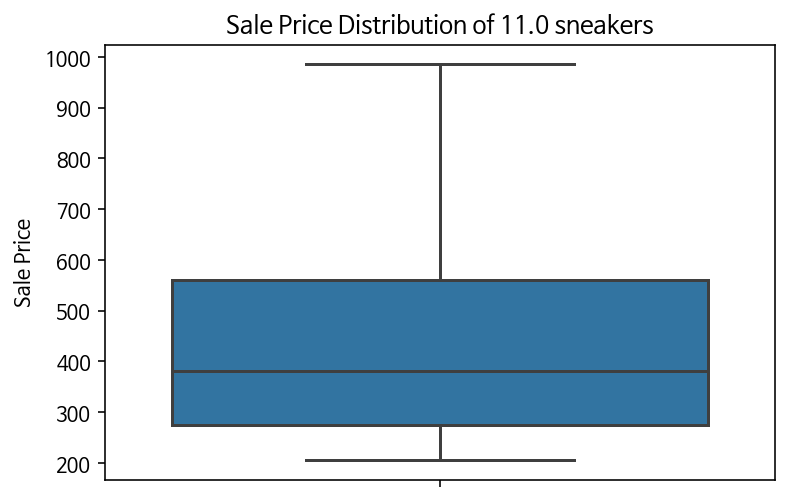

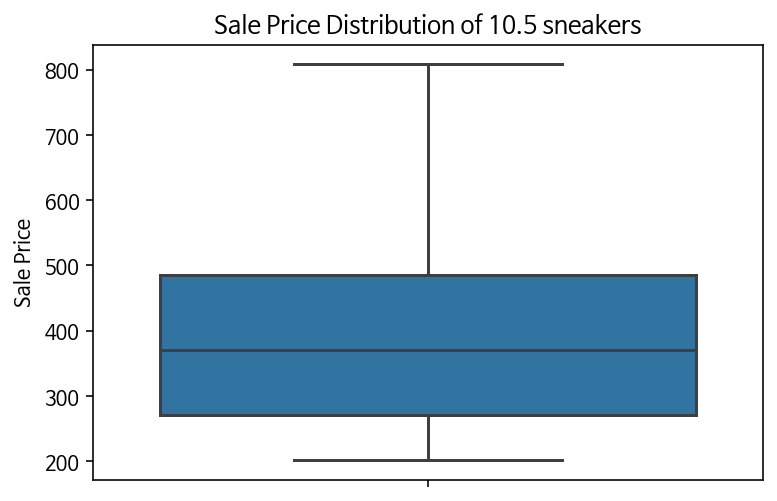

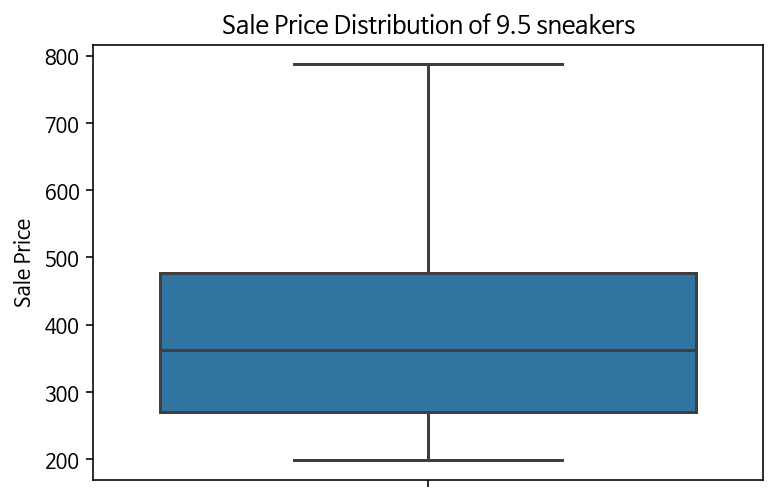

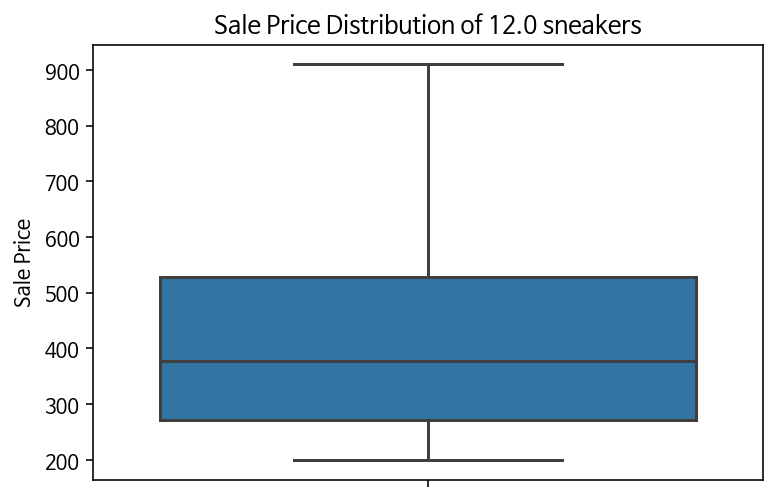

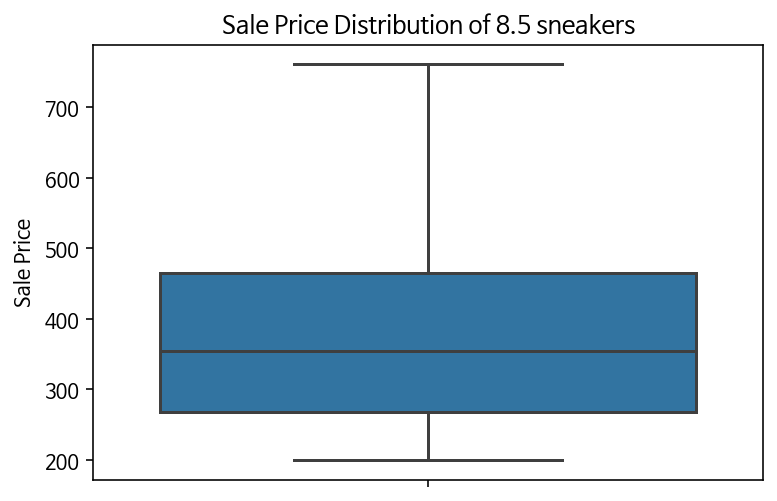

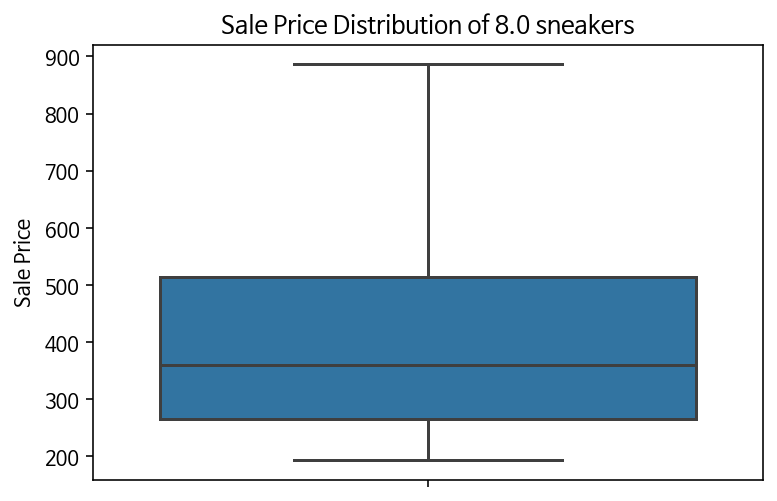

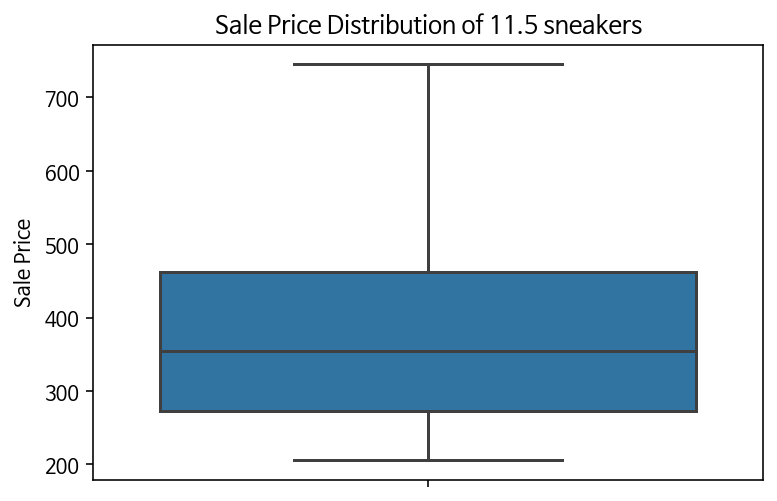

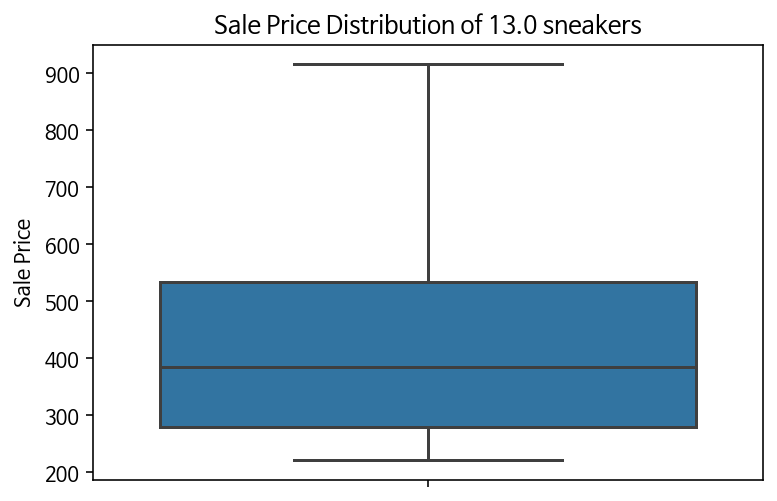

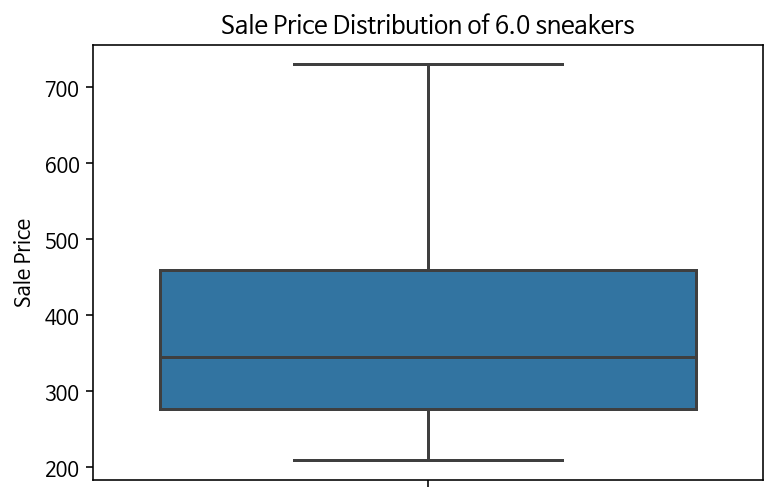

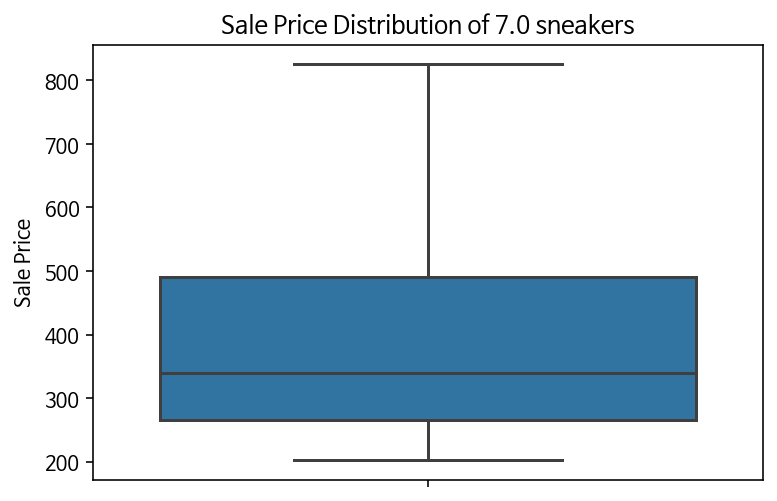

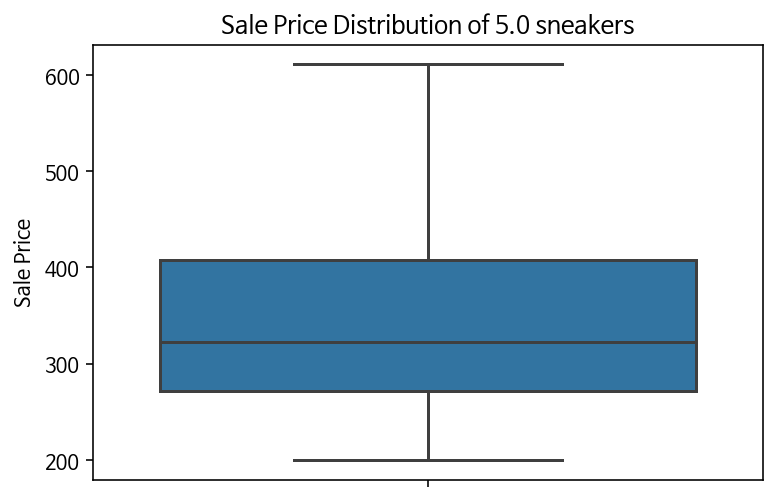

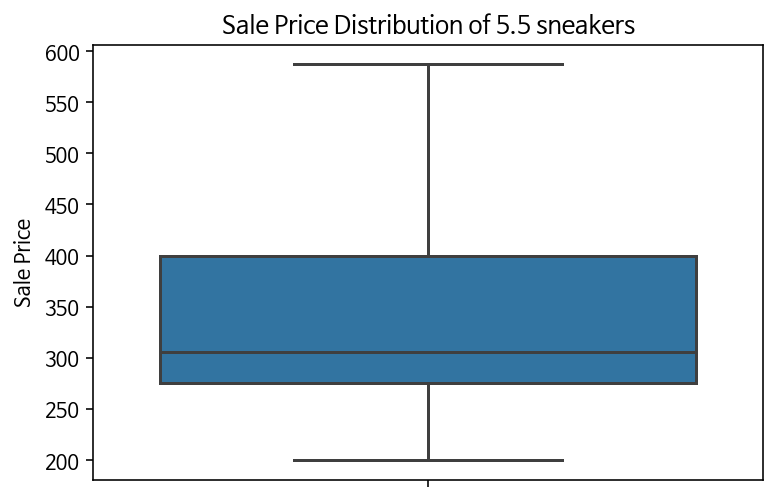

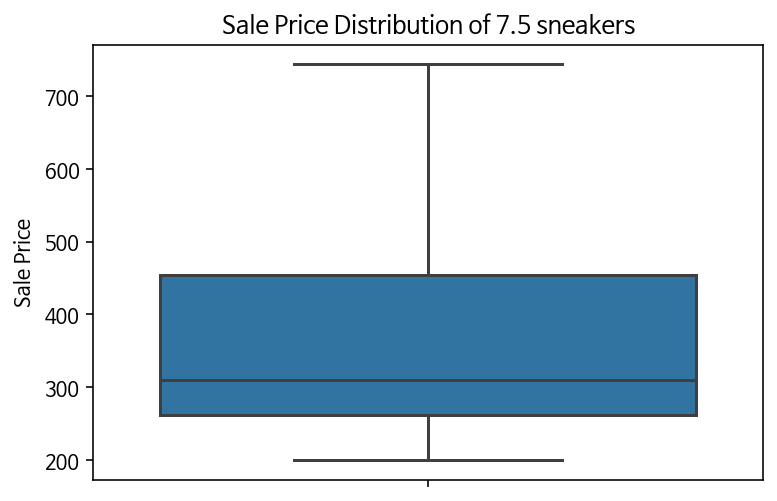

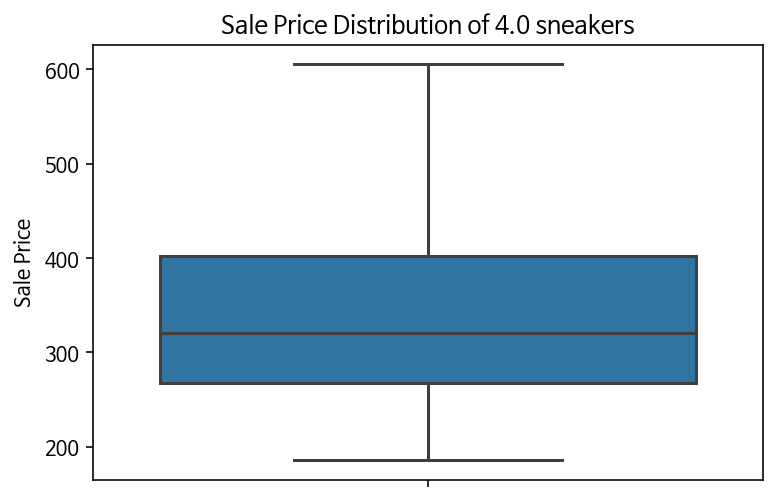

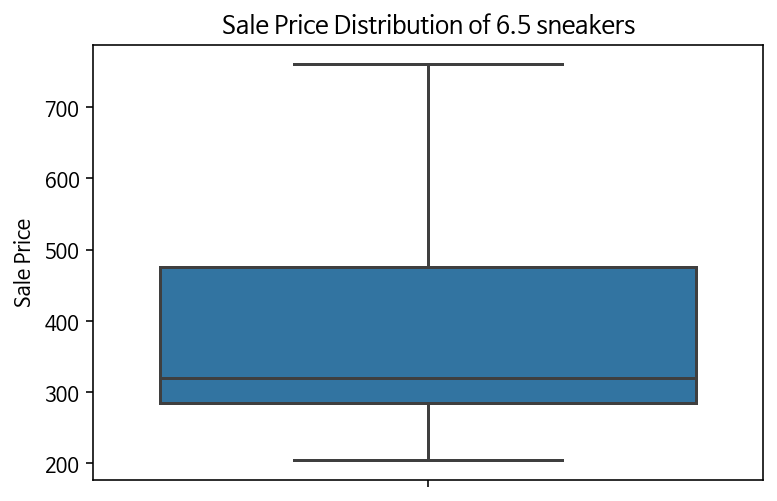

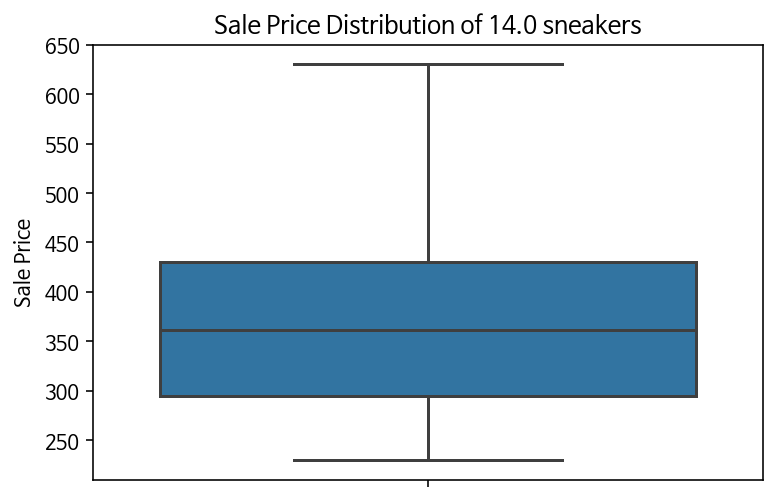

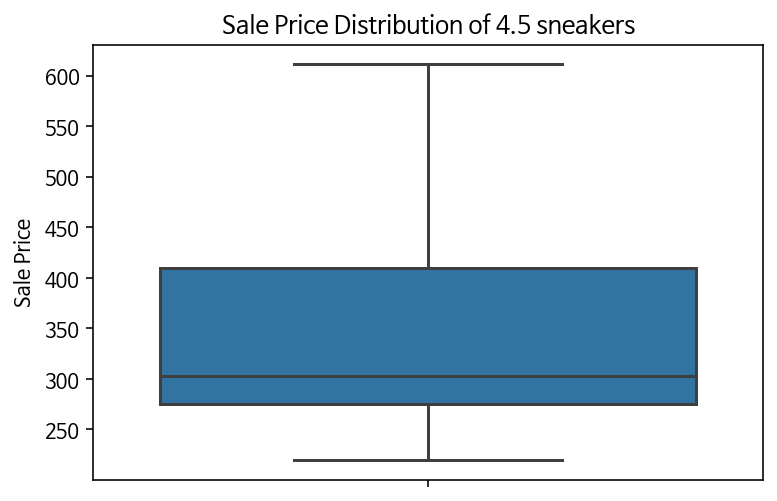

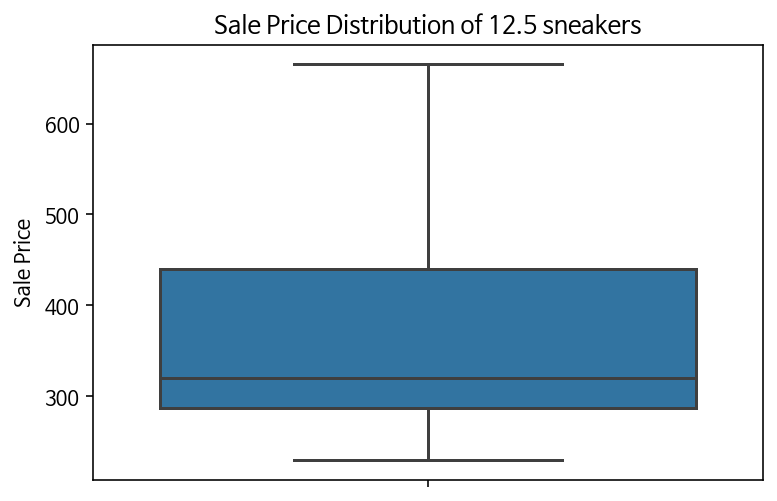

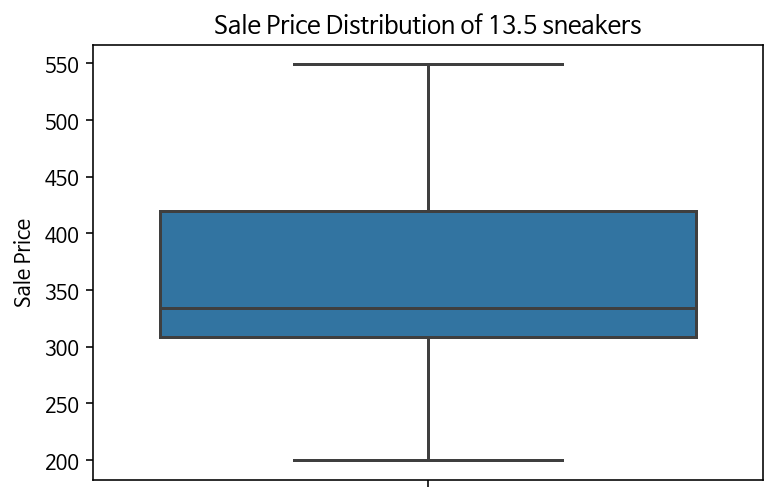

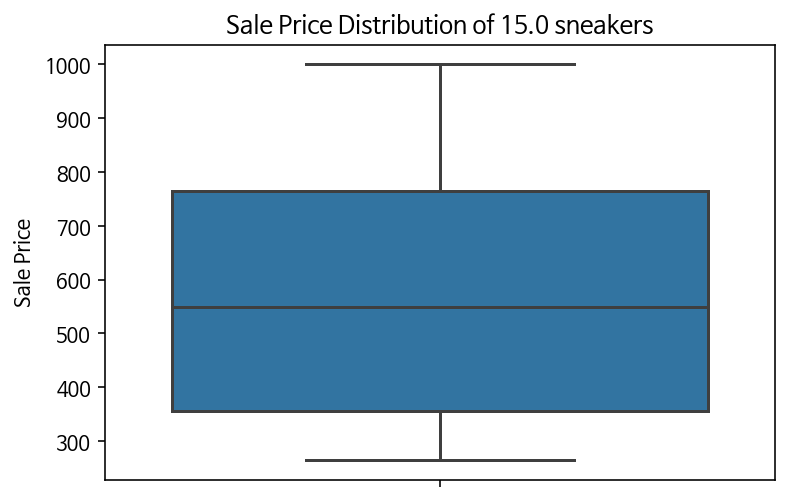

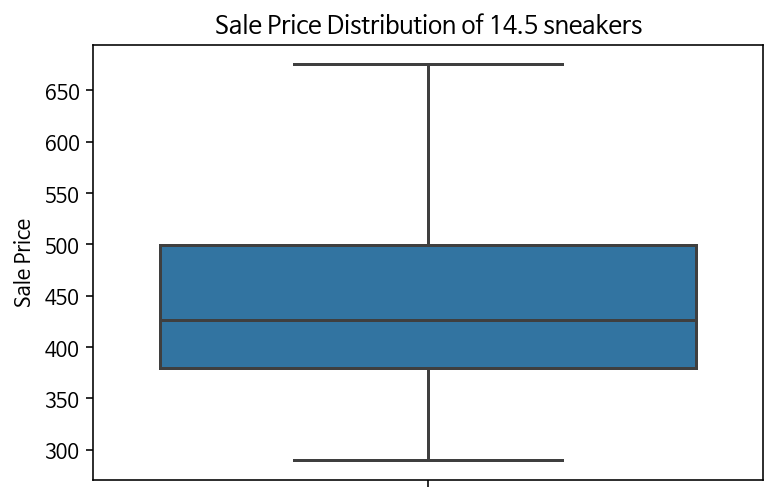

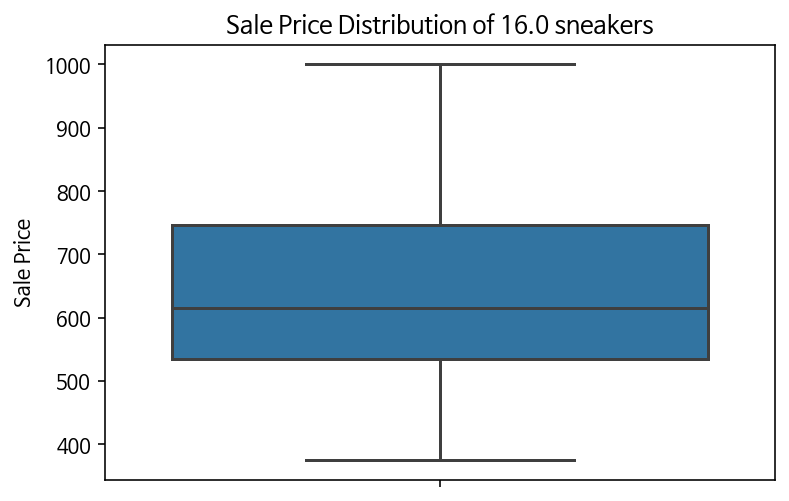

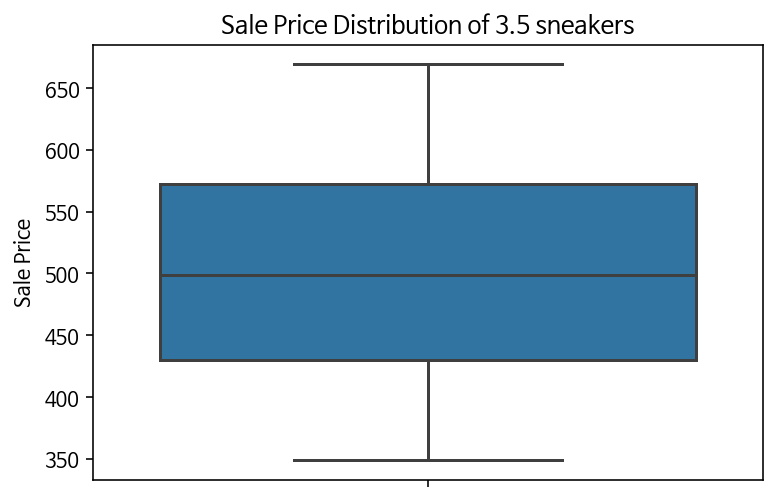

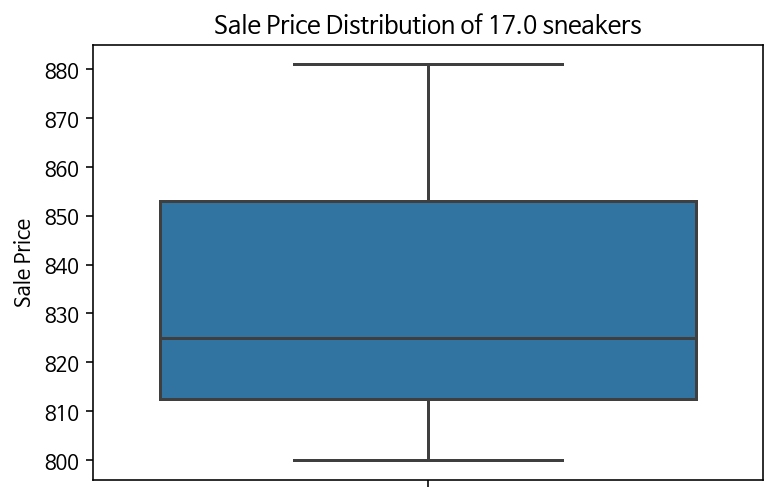

In [ ]:
for size in Shoe_size:
  shoerow = target_df.loc[target_df['Shoe Size']==size]
  chart = sns.boxplot(y=shoerow['Sale Price'],showfliers = False) # 이상치 안보여줌
  chart.set_title("Sale Price Distribution of %s sneakers" % (size))
  plt.show()
  

### 2022 Kream (click)

In [ ]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return,Sliced Name
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1,Adidas Yeezy Boost
1,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282,West,3.1,Adidas Yeezy Boost
2,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East,3.8,Adidas Yeezy Boost
3,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,2017-02-11,8.5,Michigan,False,False,True,202,East,3.6,Adidas Yeezy Boost
4,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black White,784,220,2016-12-17,11.0,California,False,False,True,258,West,3.6,Adidas Yeezy Boost


## 트랜드 분석 : 판매가와 주문일

In [ ]:
target_df = df[['Order Date', 'Sale Price']]
# ndarray 형태의 unique 를 list형태로
uniq_ord_dates = df['Order Date'].value_counts().index.tolist()
avgs_price3 = []

for date in uniq_ord_dates:
  daterow = target_df[target_df['Order Date']==date]
  avgs_price3.append(daterow['Sale Price'].mean())
  
uniq_dates = pd.Series(uniq_ord_dates)
date_avgs = pd.Series(avgs_price3)
dateprice_df = pd.DataFrame(columns=['Order_date', 'Average_Price'])
dateprice_df['Order_date'] = uniq_dates.sort_values(ascending=True)
dateprice_df['Average_Price']=date_avgs
dateprice_df.head()


,Order_date,Average_Price
474,2017-09-01,611.761905
496,2017-09-02,649.600000
503,2017-09-03,614.000000
490,2017-09-04,623.764706
473,2017-09-05,624.333333


Text(0.5, 1.0, 'Average Daily Sale Price Over time')

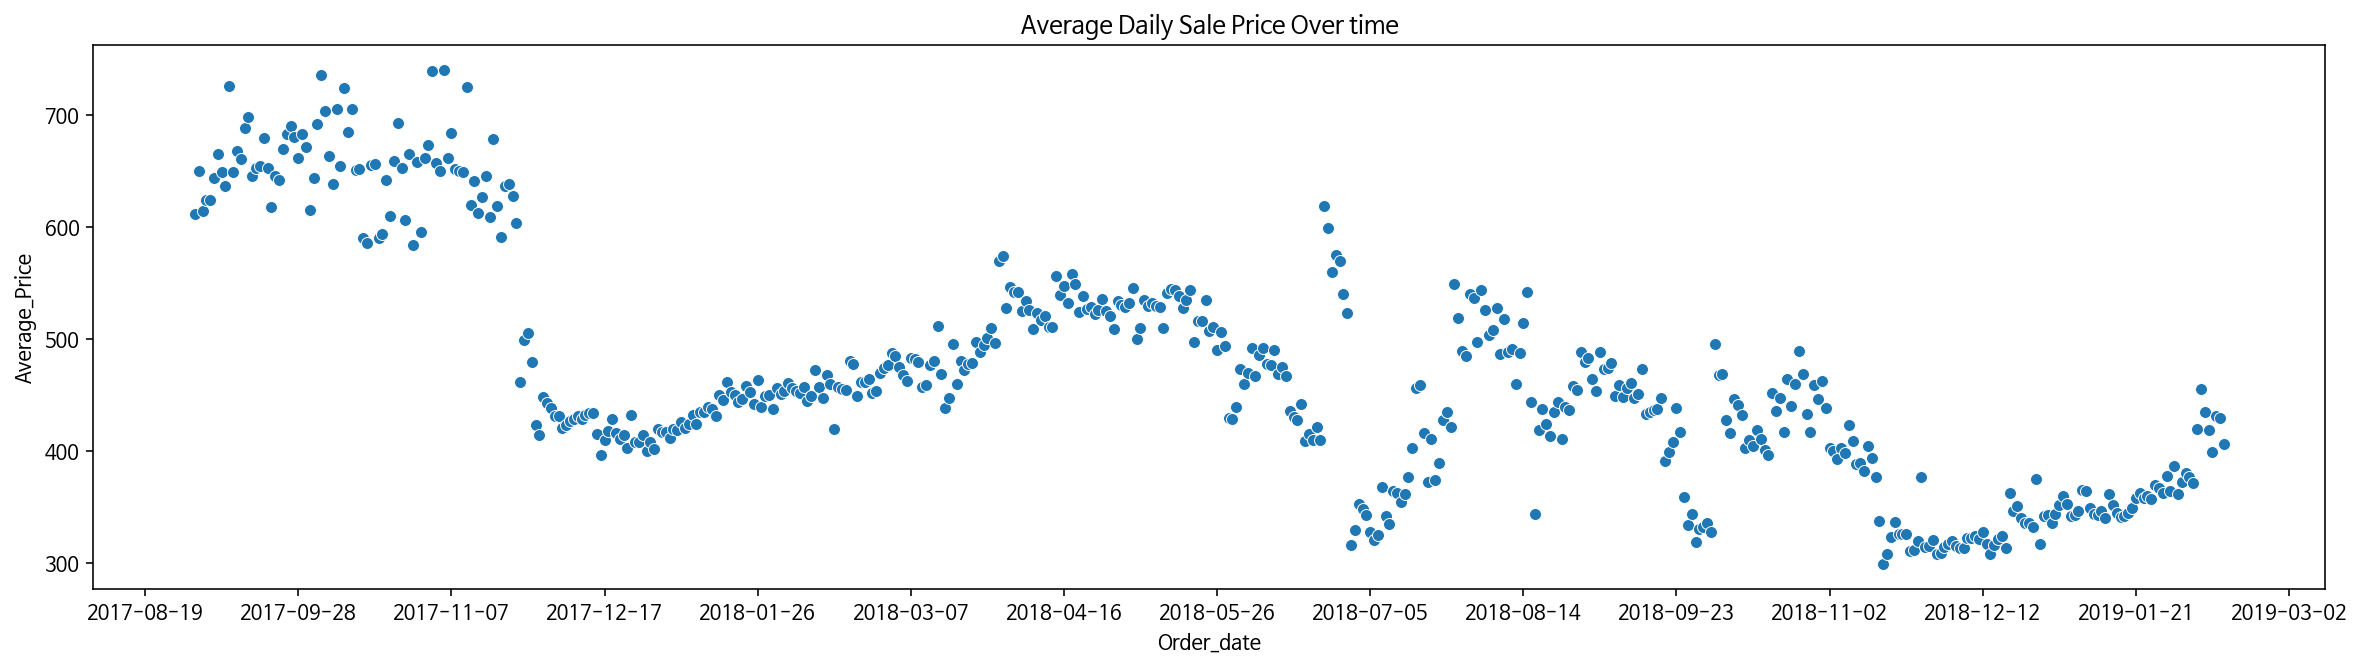

In [ ]:
# 주문일 기준 시간에 따른 평균가격 변화 

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Order_date",y="Average_Price",data=dateprice_df)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(40))
chart.set_title("Average Daily Sale Price Over time")

33


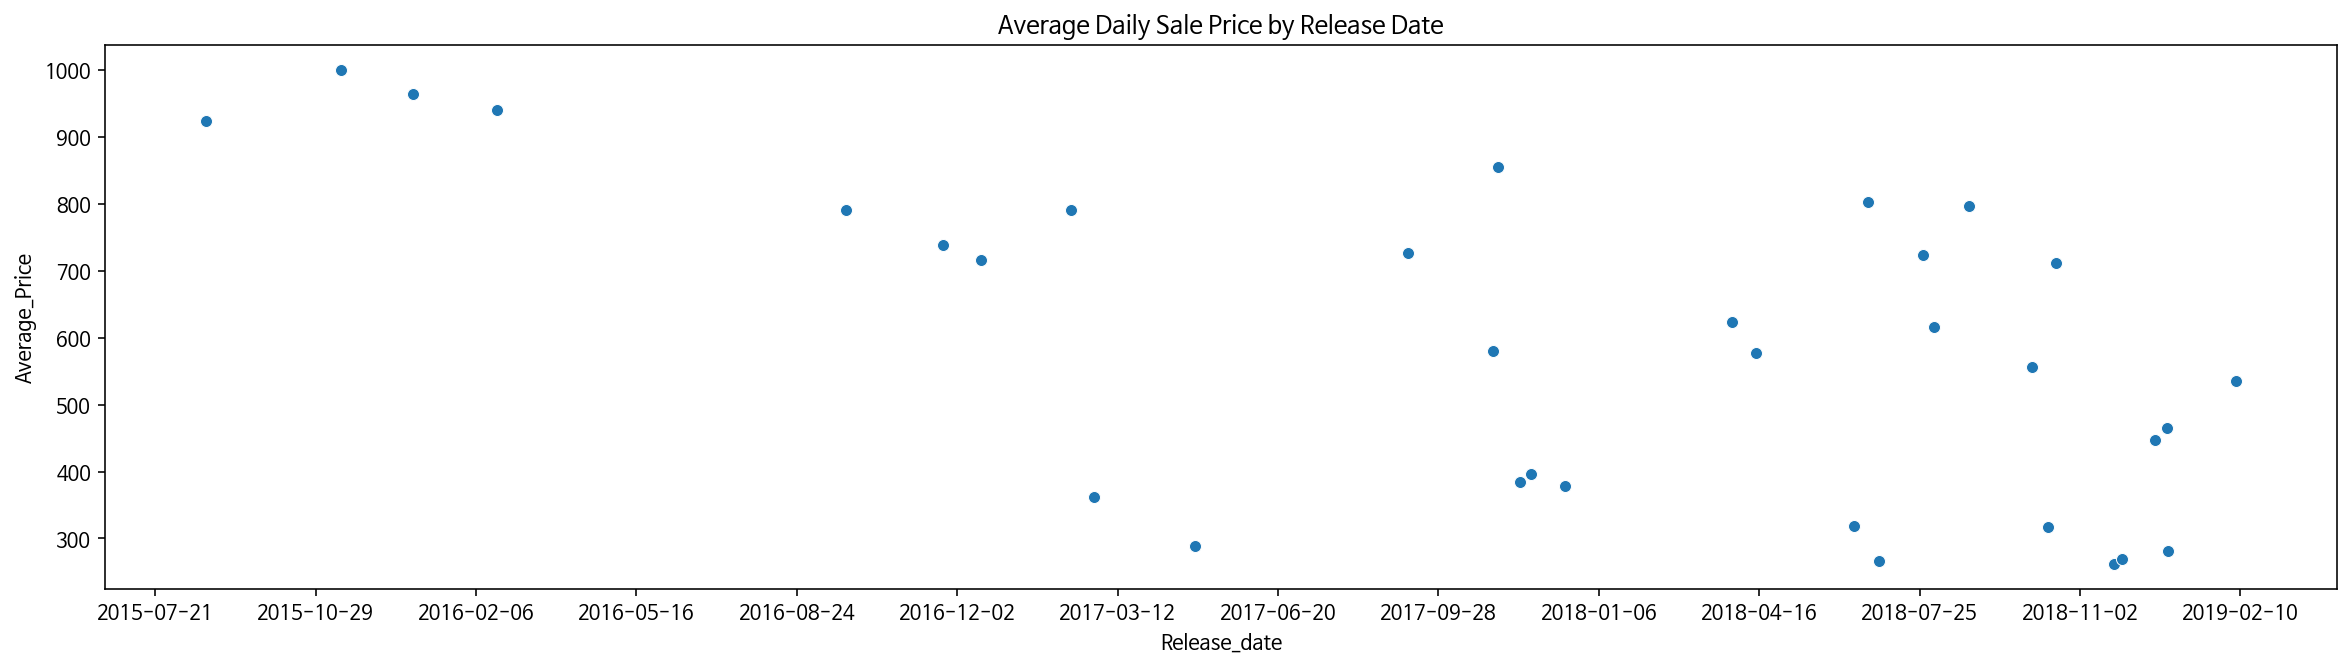

In [ ]:
# 출시일 기준 시간에 따른 평균가격 변화 (확인 결과 출시일 고유값이 35개 뿐임)

target_df = df[['Release Date','Sale Price']]
uniq_rel = target_df['Release Date'].unique()
avgprice=[]

for uni in uniq_rel:
  daterow = target_df.loc[target_df['Release Date']== uni]
  avgprice.append(daterow['Sale Price'].mean())

Date = pd.Series(uniq_rel)
avgPrice = pd.Series(avgprice)
print(len(avgPrice))
rel_dateprice_df = pd.DataFrame(columns=['Release_date','Average_Price'])
rel_dateprice_df['Release_date'] = Date.sort_values(ascending=True)
rel_dateprice_df['Average_Price'] = avgPrice

fig_dims = (20,5)
fig,ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Release_date",y="Average_Price",data=rel_dateprice_df)
chart.set_title("Average Daily Sale Price by Release Date")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(100))

## 출시일 -> 판매일 gap 에 따른 가격

### 2017~2019 StockX (Train data)

In [ ]:
# 200: 0~200
# 400 : 200~ 400
# 600 : 400~ 600
# 800 : 600~ 800
time_gap_cate = []
for i in bruh['time gap']:
  if i<=200:
    time_gap_cate.append(200)
  elif i <=400:
    time_gap_cate.append(400)
  elif i <=600:
    time_gap_cate.append(600)
  elif i <= 800:
    time_gap_cate.append(800)
  else:
    time_gap_cate.append('False')

bruh_timegap = bruh.copy()
bruh_timegap['time_gap_cate'] = time_gap_cate

bruh_timegap['time_gap_cate'].value_counts()

200    61211
600    10694
800     9934
400     9750
Name: time_gap_cate, dtype: int64

200 average price : $418.46594566336114
600 average price : $349.4454834486628
800 average price : $334.68884638614855
400 average price : $469.7634871794872


Text(0, 0.5, 'Mean price')

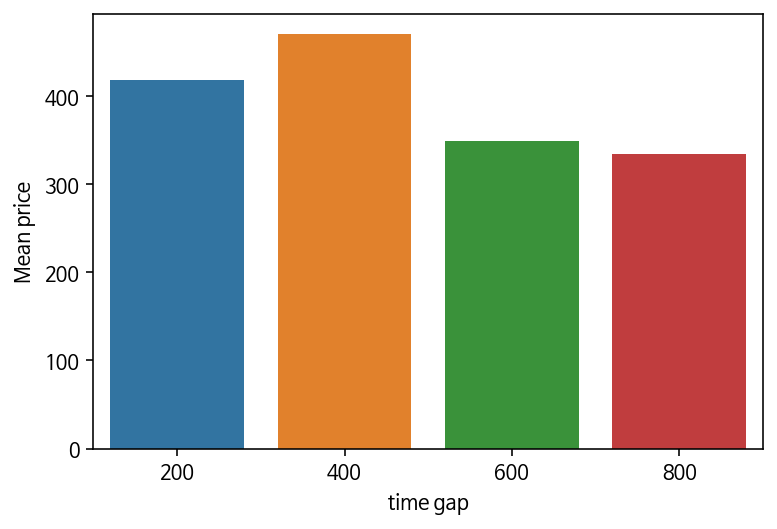

In [ ]:
avgs_price2 =[]
target_df = bruh_timegap[['time_gap_cate','Sale Price']]
time_gap = bruh_timegap['time_gap_cate'].value_counts().index.tolist()

for time_gap_index in range(len(time_gap)):
  timerow = target_df.loc[target_df['time_gap_cate'] == time_gap[time_gap_index]]
  avgs_price2.append(timerow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{time_gap[i]} average price : $' + str(avgs_price2[i]))

chart = sns.barplot(x = time_gap, y= avgs_price2)
chart.set_xlabel('time gap')
chart.set_ylabel('Mean price')

### 2022 StockX (Test data)

In [ ]:
test_df2 = test_df2.drop(test_df2[test_df2['time gap']>1000].index)
len(test_df2)

854

In [ ]:
# 200: 0~200
# 400 : 200~ 400
# 600 : 400~ 600
# 800 : 600~ 800
time_gap_cate = []
for i in test_df2['time gap']:
  if i<=200:
    time_gap_cate.append(200)
  elif i <=400:
    time_gap_cate.append(400)
  elif i <=600:
    time_gap_cate.append(600)
  elif i <= 800:
    time_gap_cate.append(800)
  elif i <= 1000:
    time_gap_cate.append(1000)
  else:
    time_gap_cate.append('False')

test_df2['time_gap_cate'] = time_gap_cate

test_df2['time_gap_cate'].value_counts()

200     441
400     201
600     121
800      53
1000     38
Name: time_gap_cate, dtype: int64

In [ ]:
test_df2

,Sneaker Name,Brand,Retail Price,Release Date,Sale Price,time gap,Sliced Name,time_gap_cate
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188,7,Adidas Yeezy Foam,200
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209,4,Jordan 1 Retro,200
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333,0,Jordan 4 Retro,200
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566,5,NikeCraft General Purpose,200
5,adidas Yeezy Boost 700 MNVN Laceless Phosphor,Adidas,220,2022-06-13,217,2,Adidas Yeezy Boost,200
...,...,...,...,...,...,...,...,...
995,Nike Air Force 1 Low G-Dragon Peaceminusone Pa...,Nike,200,2020-11-25,448,567,Nike Air Force,600
996,Jordan 1 Retro High Black Satin Gym Red,Jordan,170,2020-01-18,190,879,Jordan 1 Retro,1000
997,Nike Air Max 90 Recraft Triple White,Nike,120,2020-01-09,123,888,Nike Air Max,1000
998,adidas Yeezy Boost 350 V2 Fade,Adidas,220,2020-11-11,304,581,Adidas Yeezy Boost,600


200 average price : $191.05668934240362
400 average price : $206.27860696517413
600 average price : $216.2396694214876
800 average price : $236.50943396226415
1000 average price : $248.3684210526316


Text(0, 0.5, 'Mean price')

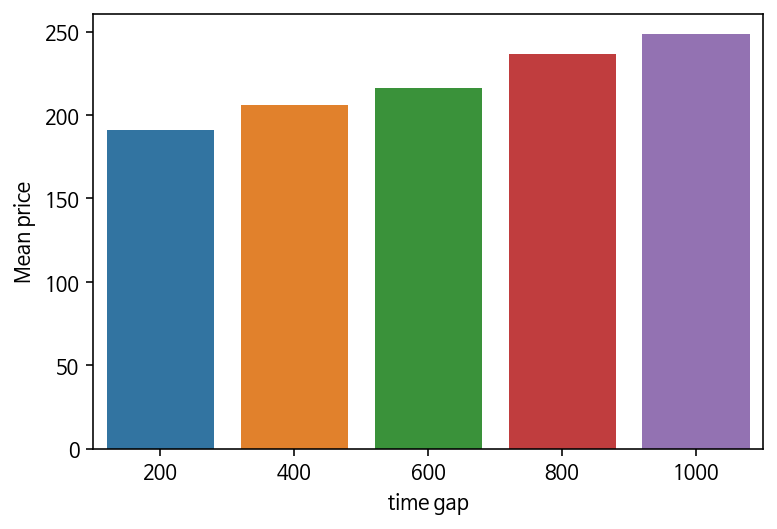

In [ ]:
# 상품별이 아닌 브랜드별로 time gap에 따라 평균 가격이 어떻게 형성되는지도 알아보기

avgs_price2 =[]
target_df = test_df2[['time_gap_cate','Sale Price']]
time_gap = test_df2['time_gap_cate'].value_counts().index.tolist()

for time_gap_index in range(len(time_gap)):
  timerow = target_df.loc[target_df['time_gap_cate'] == time_gap[time_gap_index]]
  avgs_price2.append(timerow['Sale Price'].mean())
for i in range(len(avgs_price2)):
  print(f'{time_gap[i]} average price : $' + str(avgs_price2[i]))

chart = sns.barplot(x = time_gap, y= avgs_price2)
chart.set_xlabel('time gap')
chart.set_ylabel('Mean price')

## 트랜드 분석 : 구매자 지역과 판매 가격 비교

In [ ]:
target_df = df[['Buyer Region','Sale Price']]
uniq_region = df['Buyer Region'].value_counts().index.tolist()
avg_price = []

for region in uniq_region:
  region_row = target_df.loc[target_df['Buyer Region']==region]
  avg_price.append(region_row['Sale Price'].mean())

region_col = pd.Series(uniq_region)
avgprice_col = pd.Series(avg_price)

regionprice_df = pd.DataFrame(columns=['Buyer Region','Average Price'])
regionprice_df['Buyer Region'] = region_col
regionprice_df['Average Price'] = avgprice_col
regionprice_df.head().sort_values('Average Price',ascending=True)

,Buyer Region,Average Price
4,Texas,387.705549
3,Florida,401.120249
1,New York,405.364914
0,California,426.044155
2,Oregon,429.603267


Text(0.5, 1.0, 'Average Sale Price by Buyer Region')

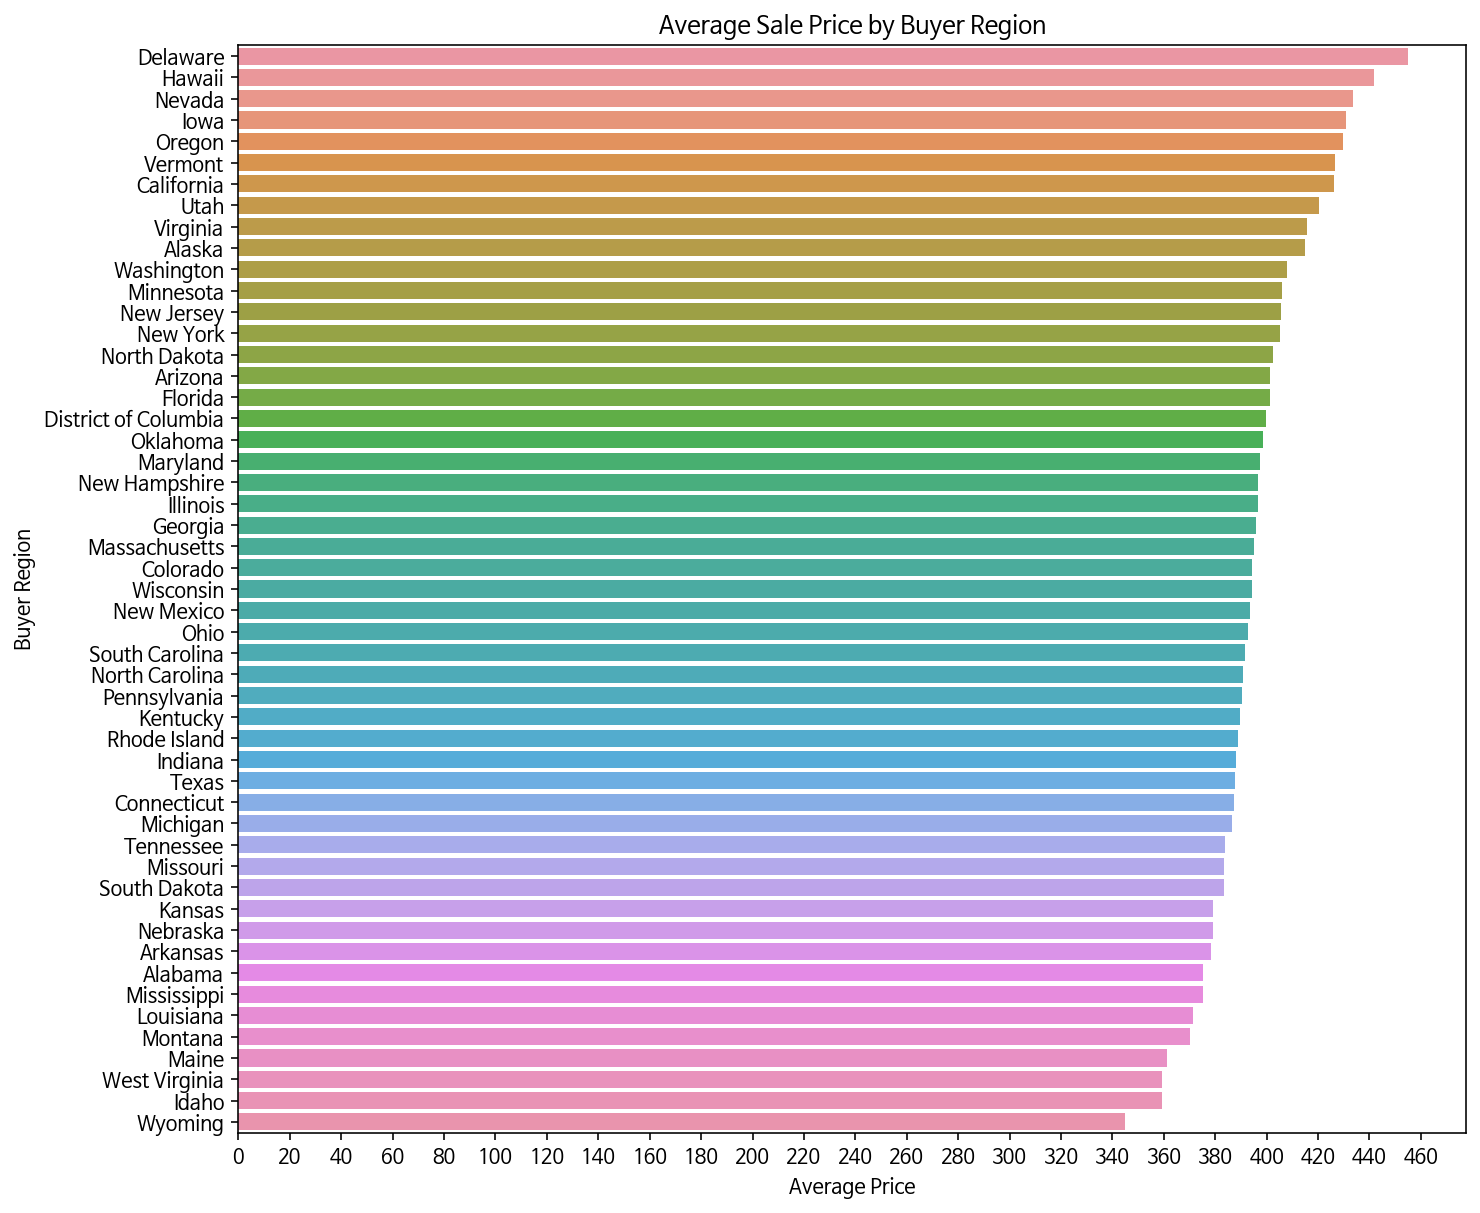

In [ ]:
fig,ax = plt.subplots(figsize=(11,10))
chart = sns.barplot(x='Average Price',y='Buyer Region',data=regionprice_df.sort_values('Average Price',ascending=False))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(20))
chart.set_title("Average Sale Price by Buyer Region")

# Modeling
* 상품의 평균 가격 예측 
* train 데이터(df)의 브랜드, 신발 이름, (주문일-출시일), 소매가 => 판매가 예측 학습
* test 데이터(test_df2) 의 브랜드, 신발 이름, (현재날짜 - 출시일), 소매가 [입력] => 평균신발가격과 비슷한지 성능 평가

In [ ]:
# 테스트 데이터 컬럼 필요한것만 남기는 작업
df2 = df.copy()
test2 = test.copy()
test2.drop(columns=['Unnamed: 0'],inplace=True)
test2.columns=['Sneaker_Name','Brand','retail Price','Release Date','가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','연간가장낮은가격','최근12개월간가격변동률','팔린신발수','평균신발가격','최근 판매가','최근가격변동률']
test_df = test2.drop(columns=['가장낮은판매입찰가격','판매입찰수','최근12개월간판매건수','가장높은구매입찰가격','구매입찰수','연간가장높은가격','팔린신발수','연간가장낮은가격','최근12개월간가격변동률','최근가격변동률'])
# 여기서 최근 판매가는 변동성이 너무 커서 우리의 머신러닝 모델로 예측하는 가격은 평균신발가격으로 설정하는게 좋을 것같아서 최근 판매가 컬럼도 삭제하겠습니다.
test_df2 = test_df.drop('최근 판매가',axis=1)
test_df2.head()

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격
0,adidas Yeezy Foam RNR Onyx,adidas,80,2022-06-08,188
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566
4,adidas Yeezy Boost 700 Hi-Res Red,adidas,300,2022-06-17,354


In [ ]:
test_df2['Brand'] = test_df2['Brand'].apply(lambda x: x.replace('adidas','Adidas'))
test_df2

,Sneaker_Name,Brand,retail Price,Release Date,평균신발가격
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188
1,Jordan 1 Retro High OG Visionaire,Jordan,170,2022-06-11,209
2,Jordan 4 Retro Infrared,Jordan,200,2022-06-15,333
3,NikeCraft General Purpose Shoe Tom Sachs,Nike,110,2022-06-10,566
4,adidas Yeezy Boost 700 Hi-Res Red,Adidas,300,2022-06-17,354
...,...,...,...,...,...
995,Nike Air Force 1 Low G-Dragon Peaceminusone Pa...,Nike,200,2020-11-25,448
996,Jordan 1 Retro High Black Satin Gym Red,Jordan,170,2020-01-18,190
997,Nike Air Max 90 Recraft Triple White,Nike,120,2020-01-09,123
998,adidas Yeezy Boost 350 V2 Fade,Adidas,220,2020-11-11,304


In [ ]:
df2.head(1)

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return,Sliced Name
0,2017-09-01,Yeezy,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1,Adidas Yeezy Boost


In [ ]:
df2.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return',
       'Sliced Name'],
      dtype='object')

In [ ]:

df2['split'] = df2['Sneaker Name'].apply(lambda x: x.replace('adidas','Adidas'))
df2['split'] = df2['Sneaker Name'].apply(lambda x: x.split(' '))
brand_new = []
for i in range(len(df2['split'])):
  if 'Adidas' in df2['split'][i]:
    brand_new.append('Adidas')
  elif 'Nike' in df2['split'][i]:
    brand_new.append('Nike')

new_brand = pd.Series(brand_new)
df2['brand_new'] = new_brand
df2 = df2[['Order Date', 'Brand','brand_new', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Cheaper Buy', 'Same Buy',
       'Expensive Buy', 'time gap', 'cardinal point', 'multiple_return',
       'split' ]]
df2.head()

,Order Date,Brand,brand_new,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Cheaper Buy,Same Buy,Expensive Buy,time gap,cardinal point,multiple_return,split
0,2017-09-01,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, C..."
1,2017-09-01,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Green,690,220,2016-11-23,11.0,California,False,False,True,282,West,3.1,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, G..."
2,2017-09-01,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Red 2017,828,220,2017-02-11,11.0,Rhode Island,False,False,True,202,East,3.8,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, R..."
3,2017-09-01,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Red 2017,798,220,2017-02-11,8.5,Michigan,False,False,True,202,East,3.6,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, R..."
4,2017-09-01,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black White,784,220,2016-12-17,11.0,California,False,False,True,258,West,3.6,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, W..."


In [ ]:
train_df = df2.copy()
test_df = test_df2.copy()

## 머신러닝 모델링을 위한 전처리

In [ ]:
train_df.columns

Index(['Order Date', 'Brand', 'brand_new', 'Sneaker Name', 'Sale Price',
       'Retail Price', 'Release Date', 'Shoe Size', 'Buyer Region',
       'Cheaper Buy', 'Same Buy', 'Expensive Buy', 'time gap',
       'cardinal point', 'multiple_return', 'split'],
      dtype='object')

### 컬럼명 변경

In [ ]:
# 컬럼명 공백 제거

train_df = train_df.rename(columns={
    "Order Date":"Order_date",
    "Sneaker Name": "Sneaker_Name",
    "Sale Price": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Release Date": "Release_Date",
    "Shoe Size": "Shoe_Size",
    "Buyer Region": "Buyer_Region", 
    'Cheaper Buy': 'Cheaper_Buy',
    'Same Buy':'Same_Buy',
    'Expensive Buy':'Expensive_Buy',
    'time gap':'time_gap',
    'cardinal point':'cardinal_point'
    })
train_df.head(1)

,Order_date,Brand,brand_new,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point,multiple_return,split
0,2017-09-01,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,2016-11-23,11.0,California,False,False,True,282,West,3.1,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, C..."


In [ ]:
test_df = test_df.rename(columns={
    'retail Price':'Retail_Price',
    'Release Date':'Release_Date',
    '평균신발가격':'Average_Price'
})
test_df.head(1)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price
0,adidas Yeezy Foam RNR Onyx,Adidas,80,2022-06-08,188


In [ ]:
# 날짜 데이터 -> 수치형 데이터 전환
import datetime as dt

train_df['Order_date'] = pd.to_datetime(train_df['Order_date'])
train_df['Order_date']=train_df['Order_date'].map(dt.datetime.toordinal)

train_df['Release_Date'] = pd.to_datetime(train_df['Release_Date'])
train_df['Release_Date']=train_df['Release_Date'].map(dt.datetime.toordinal)

train_df['time_gap']=train_df['Order_date']-train_df['Release_Date']

In [ ]:
# 데이터 수집일자 컬럼 추가
Crowling_Data = ['2022-06-15']*len(test_df)
test_df['Crowling_Data']=Crowling_Data
test_df['Crowling_Data'] = pd.to_datetime(test_df['Crowling_Data'],format='%Y-%m-%d')
test_df.dtypes

Sneaker_Name             object
Brand                    object
Retail_Price              int64
Release_Date             object
Average_Price             int64
Crowling_Data    datetime64[ns]
dtype: object

In [ ]:
test_df['Release_Date'] = pd.to_datetime(test_df['Release_Date'])
test_df['Release_Date']=test_df['Release_Date'].map(dt.datetime.toordinal)

test_df['Crowling_Data']=test_df['Crowling_Data'].map(dt.datetime.toordinal)


# 수집일 - 출시일 = time gap 컬럼 생성
test_df['time_gap']=test_df['Crowling_Data']-test_df['Release_Date']
test_df.head(2)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price,Crowling_Data,time_gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,738314,188,738321,7
1,Jordan 1 Retro High OG Visionaire,Jordan,170,738317,209,738321,4


### Target Feature 등 컬럼 제거 후 train/test set 분리

In [ ]:
train_df.head(1)

,Order_date,Brand,brand_new,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,Cheaper_Buy,Same_Buy,Expensive_Buy,time_gap,cardinal_point,multiple_return,split
0,736573,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Core Black Copper,685,220,736291,11.0,California,False,False,True,282,West,3.1,"[Adidas, Yeezy, Boost, 350, V2, Core, Black, C..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics

X = train_df.drop(['Sale_Price','Cheaper_Buy','Same_Buy','Expensive_Buy','cardinal_point','Buyer_Region','Shoe_Size','multiple_return'],axis=1)
y = train_df['Sale_Price']


X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)


In [ ]:
print(X.shape)

(91589, 8)


In [ ]:
X_train.head()

,Order_date,Brand,brand_new,Sneaker_Name,Retail_Price,Release_Date,time_gap,split
55332,737015,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Zebra,220,736385,630,"[Adidas, Yeezy, Boost, 350, V2, Zebra]"
62108,737029,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Sesame,220,737021,8,"[Adidas, Yeezy, Boost, 350, V2, Sesame]"
3331,736659,Off-White,Nike,Nike Air Presto Off White,160,736581,78,"[Nike, Air, Presto, Off, White]"
17148,736747,Yeezy,Adidas,Adidas Yeezy Boost 350 V2 Zebra,220,736385,362,"[Adidas, Yeezy, Boost, 350, V2, Zebra]"
20415,736788,Off-White,Nike,Nike Air VaporMax Off White Black,250,736783,5,"[Nike, Air, VaporMax, Off, White, Black]"


In [ ]:
X_train = X_train.rename(columns={
    'Brand' : 'brand',
    'brand_new' : 'Brand'})
X_train = X_train.drop(columns=['brand','split'])
X_train.head()

,Order_date,Brand,Sneaker_Name,Retail_Price,Release_Date,time_gap
55332,737015,Adidas,Adidas Yeezy Boost 350 V2 Zebra,220,736385,630
62108,737029,Adidas,Adidas Yeezy Boost 350 V2 Sesame,220,737021,8
3331,736659,Nike,Nike Air Presto Off White,160,736581,78
17148,736747,Adidas,Adidas Yeezy Boost 350 V2 Zebra,220,736385,362
20415,736788,Nike,Nike Air VaporMax Off White Black,250,736783,5


In [ ]:
X_val = X_val.rename(columns={
    'Brand' : 'brand',
    'brand_new' : 'Brand'})
X_val = X_val.drop(columns=['brand','split'])
X_val.head()

,Order_date,Brand,Sneaker_Name,Retail_Price,Release_Date,time_gap
63137,737031,Adidas,Nike Zoom Fly Off White Pink,170,737026,5
1400,736646,Adidas,Adidas Yeezy Boost 350 V2 Cream White,220,736448,198
17880,736756,Adidas,Adidas Yeezy Boost 350 V2 Beluga 2pt0,220,736658,98
21835,736804,Adidas,Adidas Yeezy Boost 350 V2 Blue Tint,220,736679,125
48457,736982,Nike,Nike Air Presto Off White White 2018,160,736909,73


In [ ]:
test_df.head(1)

,Sneaker_Name,Brand,Retail_Price,Release_Date,Average_Price,Crowling_Data,time_gap
0,adidas Yeezy Foam RNR Onyx,Adidas,80,738314,188,738321,7


In [ ]:
X_test = test_df.drop('Average_Price',axis=1)
y_test = test_df['Average_Price']

### Encoding

In [ ]:
# 범주형 데이터 -> 수치형 데이터

from sklearn.preprocessing import OneHotEncoder

object_cols = ['Sneaker_Name','Brand'] 


# 범주형 데이터를 가진 컬럼에 원핫인코딩 적용
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))

OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# 원핫인코딩 인덱스 제거 -> 인덱스 치환
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

OH_cols_test.index = X_test.index

# 원핫 인코딩 후 컬럼명 추가
OH_cols_train.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names(object_cols)

OH_cols_test.columns = OH_encoder.get_feature_names(object_cols)

# train, validation 데이터셋에서 원핫인코딩한 컬럼들 삭제(수치형 Feature들만 존재)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)

num_X_test = X_test.drop(object_cols, axis=1)

# 원핫인코딩한 결과 병합
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [ ]:
OH_X_train.head(2)

,Order_date,Retail_Price,Release_Date,time_gap,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,...,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Brand_Adidas,Brand_Nike,Brand_nan
55332,737015,220,736385,630,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62108,737029,220,737021,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 모델 적용

### Baseline - Linear Regression

In [ ]:
OH_X_train.head()

,Order_date,Retail_Price,Release_Date,time_gap,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,...,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Brand_Adidas,Brand_Nike,Brand_nan
55332,737015,220,736385,630,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62108,737029,220,737021,8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3331,736659,160,736581,78,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17148,736747,220,736385,362,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20415,736788,250,736783,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(OH_X_train,y_train)

LinearRegression()

In [ ]:
# y절편 확인

print(lm.intercept_)

-15483864217.618895


In [ ]:
# y절편 확인(브랜드 명 수정 후)

print(lm.intercept_)

-15483864217.618895


In [ ]:
# 상관계수 확인

coeff_df = pd.DataFrame(lm.coef_,OH_X_train.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient",ascending=True)
ranked_coeff

,Coefficient
time_gap,-9.956439e+10
Release_Date,-9.956437e+10
Sneaker_Name_adidas Yeezy Boost 350 V2 Static,-9.944590e+06
Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,-9.923404e+06
Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,-9.230614e+06
Sneaker_Name_Nike Air VaporMax Off White 2018,-6.718891e+06
Sneaker_Name_Nike Air Max 90 Off White Desert Ore,-6.483258e+06
Sneaker_Name_Nike Air Max 90 Off White Black,-6.483235e+06
Sneaker_Name_Nike Air VaporMax Off White Black,-6.403852e+06
Sneaker_Name_Nike Air Max 97 Off White Black,-6.302676e+06


In [ ]:
# 상관계수 확인

coeff_df = pd.DataFrame(lm.coef_,OH_X_train.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient",ascending=True)
ranked_coeff

,Coefficient
time_gap,-9.956439e+10
Release_Date,-9.956437e+10
Sneaker_Name_adidas Yeezy Boost 350 V2 Static,-9.944590e+06
Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,-9.923404e+06
Sneaker_Name_Adidas Yeezy Boost 350 V2 Sesame,-9.230614e+06
Sneaker_Name_Nike Air VaporMax Off White 2018,-6.718891e+06
Sneaker_Name_Nike Air Max 90 Off White Desert Ore,-6.483258e+06
Sneaker_Name_Nike Air Max 90 Off White Black,-6.483235e+06
Sneaker_Name_Nike Air VaporMax Off White Black,-6.403852e+06
Sneaker_Name_Nike Air Max 97 Off White Black,-6.302676e+06


In [ ]:
# 예측값 저장, 평가 지표 적용

pred = lm.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,pred))
print("MSE :",metrics.mean_squared_error(y_val,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,pred)))

MAE : 47.70463260405318
MSE : 4799.158950271748
RMSE : 69.27596228326063


In [ ]:
# 예측값 저장, 평가 지표 적용

pred = lm.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,pred))
print("MSE :",metrics.mean_squared_error(y_val,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,pred)))

MAE : 47.70463260405318
MSE : 4799.158950271748
RMSE : 69.27596228326063


In [ ]:
# Test 데이터로 실제 테스트

pred = lm.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE : 7.860213501031426e+16
MSE : 6.525109211190335e+33
RMSE : 8.077814810448637e+16


In [ ]:
# Test 데이터로 실제 테스트

pred = lm.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE : 7.860213501031426e+16
MSE : 6.525109211190335e+33
RMSE : 8.077814810448637e+16


In [ ]:
y_test

0      188
1      209
2      333
3      566
4      354
      ... 
995    448
996    190
997    123
998    304
999    237
Name: Average_Price, Length: 1000, dtype: int64

In [ ]:
len(pred)

1000

In [ ]:
OH_X_valid.head()

,Order_date,Retail_Price,Release_Date,time_gap,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,...,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Brand_Adidas,Brand_Nike,Brand_nan
63137,737031,170,737026,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1400,736646,220,736448,198,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17880,736756,220,736658,98,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21835,736804,220,736679,125,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48457,736982,160,736909,73,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
OH_X_test.head()

,Retail_Price,Release_Date,Crowling_Data,time_gap,Sneaker_Name_Adidas Yeezy Boost 350 Low Moonrock,Sneaker_Name_Adidas Yeezy Boost 350 Low Oxford Tan,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2015,Sneaker_Name_Adidas Yeezy Boost 350 Low Pirate Black 2016,Sneaker_Name_Adidas Yeezy Boost 350 Low V2 Beluga,Sneaker_Name_Adidas Yeezy Boost 350 V2 Beluga 2pt0,...,Sneaker_Name_Nike Zoom Fly Mercurial Off White Total Orange,Sneaker_Name_Nike Zoom Fly Off White,Sneaker_Name_Nike Zoom Fly Off White Black Silver,Sneaker_Name_Nike Zoom Fly Off White Pink,Sneaker_Name_adidas Yeezy Boost 350 V2 Butter,Sneaker_Name_adidas Yeezy Boost 350 V2 Static,Sneaker_Name_adidas Yeezy Boost 350 V2 Static Reflective,Brand_Adidas,Brand_Nike,Brand_nan
0,80,738314,738321,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,170,738317,738321,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200,738321,738321,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110,738316,738321,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,300,738323,738321,-2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Model1

In [ ]:
from scipy import stats

fig, axs = plt.subplots(1,2, figsize = (15,6))

sns.histplot(y_train, ax =axs[0], kde=True)
stats.probplot(y_train, dist='norm', fit=True, plot=axs[1])

plt.show()

In [ ]:
sns.histplot(np.log1p(y_train), kde=True)
plt.show()

####Ridge
- 릿지 회귀는 L2-Norm을 사용한 회귀
- 일반적으로 영향을 거의 미치지 않는 특성에 대하여 0에 가까운 가중치

In [ ]:
# SelectKBest 사용하여 Ridge 모델
from sklearn.feature_selection import f_regression, SelectKBest

#f_regression을 사용하여 점수를 기반으로 중요도를 평가
selector = SelectKBest(score_func=f_regression, k = 5)

#학습데이터
X_train_selected = selector.fit_transform(OH_X_train, y_train)

#테스트데이터
X_test_selected = selector.transform(OH_X_test)

X_train_selected.shape, X_test_selected.shape

In [ ]:
all_names = OH_X_train.columns

selected_mask = selector.get_support()

# 선택된 특성들
selected_names = all_names[selected_mask]
selected_names

Index(['Retail_Price', 'Sneaker_Name_Adidas Yeezy Boost', 'Brand_Adidas',
       'Brand_Jordan', 'Brand_Nike'],
      dtype='object')

In [ ]:
import numpy as np

# selctor에서 점수 추출 (배열)
score = selector.scores_

# 가장 높은 점수의 인덱스 번호 추출
best_score_index = np.argmax(score)

# 학습 데이터셋 컬럼에서 인덱스번호에 해당하는 컬럼 이름 확인
all_names[best_score_index]

'Sneaker_Name_Adidas Yeezy Boost'

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0, 0.001, 0.01, 0.1, 1]

ridge = RidgeCV(alphas = alphas, normalize=True, cv=5)
ridge.fit(X_train_selected, y_train)

RidgeCV(alphas=array([0.   , 0.001, 0.01 , 0.1  , 1.   ]), cv=5, normalize=True)

In [ ]:
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.001
best score:  0.35554261199002973


In [ ]:
y_pred = ridge.predict(X_test_selected)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 63977.50498061021
MSE : 4392779131.8205805
RMSE : 66278.04411583507
r2_score : -213177.619055159


In [ ]:
OH_X_train.columns

Index(['Order_date', 'Retail_Price', 'Release_Date', 'time_gap',
       'Sneaker_Name_Adidas Yeezy Boost', 'Sneaker_Name_Air Jordan 1',
       'Sneaker_Name_Nike Air Force', 'Sneaker_Name_Nike Air Max',
       'Sneaker_Name_Nike Air Presto', 'Sneaker_Name_Nike Air VaporMax',
       'Sneaker_Name_Nike Blazer Mid', 'Sneaker_Name_Nike React Hyperdunk',
       'Sneaker_Name_Nike Zoom Fly', 'Brand_Adidas', 'Brand_Jordan',
       'Brand_Nike'],
      dtype='object')

In [ ]:
# 특성 모두 사용
from sklearn.linear_model import RidgeCV

alphas = [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0]

ridge = RidgeCV(alphas = alphas, normalize=True, cv=5)
ridge.fit(OH_X_train, y_train)

RidgeCV(alphas=array([1.e-03, 5.e-03, 1.e-02, 2.e-02, 3.e-02, 1.e-01, 1.e+00, 1.e+00,
       1.e+02, 1.e+03]),
        cv=5, normalize=True)

In [ ]:
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.001
best score:  0.5934686314888362


In [ ]:
y_pred = ridge.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,y_pred))
print("MSE :",metrics.mean_squared_error(y_val,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,y_pred)))
print("r2_score :", metrics.r2_score(y_val, y_pred))

MAE : 76.61586441167681
MSE : 11949.37438579823
RMSE : 109.31319401517014
r2_score : 0.5854505082637633


In [ ]:
y_pred = ridge.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 285125.8875651428
MSE : 81554930612.70436
RMSE : 285578.2390391543
r2_score : -3957804.9728102298


####Lasso 
- 선형 회귀에 규제를 적용한 다른 모델 (L1 규제)
- L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거
- L1 규제는 적절한 feature만 회귀에 포함시키는 feature 선택의 특성

In [ ]:
from sklearn.linear_model import LassoCV

alphas = [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0]

lasso = LassoCV(alphas = alphas, normalize=True, cv=5)
lasso.fit(OH_X_train, y_train)

LassoCV(alphas=[0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0],
        cv=5, normalize=True)

In [ ]:
print("alpha: ", lasso.alpha_)
print("lasso score: ", lasso.score(OH_X_train, y_train))

alpha:  0.001
lasso score:  0.5937931981374116


In [ ]:
print("training set score: {:.2f}".format(lasso.score(OH_X_train, y_train))) # 훈련 데이터 결정계수
print("test set score: {:.2f}".format(lasso.score(OH_X_valid, y_val))) # 검증 데이터 결정계수
print("test set score: {:.2f}".format(lasso.score(OH_X_test, y_test))) # 테스트 데이터 결정계수
print("the number of the used features: {}".format(np.sum(lasso.coef_ != 0))) # 사용된 특성갯수

usedfeatures = np.nonzero(lasso.coef_ != 0)
print("numbers of the used features: ", usedfeatures[0])# 사용된 특성 번호

training set score: 0.59
test set score: 0.59
test set score: -2437255.32
the number of the used features: 11
numbers of the used features:  [ 0  2  4  5  6  7  8 10 11 12 13]


In [ ]:
y_pred = lasso.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,y_pred))
print("MSE :",metrics.mean_squared_error(y_val,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,y_pred)))
print("r2_score :", metrics.r2_score(y_val, y_pred))

MAE : 76.63690818838523
MSE : 11953.124863304916
RMSE : 109.33034740320235
r2_score : 0.5853203961345448


In [ ]:
y_pred = lasso.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 224103.3583491874
MSE : 50222338247.45788
RMSE : 224103.40971849998
r2_score : -2437255.322713622


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 회귀 트리 모델
rf_reg = RandomForestRegressor(n_estimators=500)
gb_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

In [ ]:
rf_reg.fit(OH_X_train, y_train)
gb_reg.fit(OH_X_train, y_train)
xgb_reg.fit(OH_X_train, y_train)
lgbm_reg.fit(OH_X_train, y_train)

[10:00:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(n_estimators=500)

In [ ]:
y_pred = rf_reg.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 539.8271979687717
MSE : 306367.66233158944
RMSE : 553.5048891668342
r2_score : -13.867816755434603


In [ ]:
y_pred = gb_reg.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 560.292985315054
MSE : 331399.7905429655
RMSE : 575.6733366614833
r2_score : -15.082609114435183


In [ ]:
y_pred = xgb_reg.predict(OH_X_valid)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_val,y_pred))
print("MSE :",metrics.mean_squared_error(y_val,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_val,y_pred)))
print("r2_score :", metrics.r2_score(y_val, y_pred))

MAE : 26.89894382473891
MSE : 1866.796627504953
RMSE : 43.2064419676621
r2_score : 0.9352368108888738


In [ ]:
y_pred = lgbm_reg.predict(OH_X_test)

from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_score :", metrics.r2_score(y_test, y_pred))

MAE : 491.16482449241954
MSE : 252321.8549695689
RMSE : 502.31648884898146
r2_score : -11.245010046192736


### Model2

####랜덤포레스트
- 다양성을 극대화 하여 예측력이 우수한 편
- 다수의 트리 예측 결과를 종합하여 의사결정을 진행하기 때문에 안정성도 높음


In [ ]:
OH_X_train.drop(columns = ['Release_Date'], inplace = True)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline

# pipe = make_pipeline(
#     TargetEncoder(), 
#     SimpleImputer(), 
#     RandomForestRegressor(random_state=2)
# )

pipe = make_pipeline(
    RandomForestRegressor(random_state=42)
)
#rf_reg = RandomForestRegressor(random_state=42)

dists = {
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, None], 
    'randomforestregressor__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter = 10, 
    cv = 3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

model = clf.fit(OH_X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 0.9651354561347568, 'randomforestregressor__n_estimators': 499}
MAE:  27.048559050884137


In [ ]:
# 각 하이퍼파라미터 조합으로 만들어진 모델 순위
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,7,9,8,4,1,2,3,6,5,0
mean_fit_time,39.850656,10.836449,8.803914,3.389268,26.271035,12.508571,4.889434,13.419816,2.700099,15.084398
std_fit_time,0.353515,2.355121,0.245742,0.044943,0.46581,1.187577,0.301036,0.02848,0.361763,0.315182
mean_score_time,2.580963,0.968441,0.801252,0.52629,1.498219,0.859788,0.191972,0.556617,0.090376,0.953943
std_score_time,0.03735,0.112384,0.014138,0.316435,0.260646,0.007415,0.007303,0.004081,0.000304,0.060261
param_randomforestregressor__max_depth,None,None,None,None,15,10,5,5,5,5
param_randomforestregressor__max_features,0.965135,0.48033,0.454209,0.41398,0.691741,0.143092,0.733793,0.741587,0.926466,0.341391
param_randomforestregressor__n_estimators,499,201,153,59,287,381,150,457,73,490
params,"{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': 15, 'rand...","{'randomforestregressor__max_depth': 10, 'rand...","{'randomforestregressor__max_depth': 5, 'rando...","{'randomforestregressor__max_depth': 5, 'rando...","{'randomforestregressor__max_depth': 5, 'rando...","{'randomforestregressor__max_depth': 5, 'rando..."
split0_test_score,-26.82444,-26.851275,-26.879333,-26.881836,-29.956284,-41.431912,-60.606307,-60.469875,-60.738294,-63.687292
split1_test_score,-27.142453,-27.198398,-27.246878,-27.257833,-29.930417,-41.259816,-60.21432,-60.309111,-60.690072,-63.537331


In [ ]:
OH_X_valid.drop(columns = ['Release_Date'], inplace = True)
OH_X_test.drop(columns = ['Release_Date'], inplace = True)

In [ ]:
# 만들어진 모델에서 가장 성능이 좋은 모델
pipe = clf.best_estimator_

#검증, 테스트 데이터
from sklearn import metrics

y_pred = pipe.predict(OH_X_valid)
mae = metrics.mean_absolute_error(y_val, y_pred)
mse = metrics.mean_squared_error(y_val,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_val,y_pred))
r2_score = metrics.r2_score(y_val, y_pred)
print(f'검증데이터 MAE: {mae:,.0f}')
print(f'검증데이터 MSE: {mse:,.0f}')
print(f'검증데이터 RMSE: {rmse:,.0f}')
print(f'검증데이터 R2_score: {r2_score:,.0f}')

y_pred = pipe.predict(OH_X_test)
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_mse = metrics.mean_squared_error(y_test,y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
test_r2_score = metrics.r2_score(y_test, y_pred)
print(f'테스트데이터 MAE: {test_mae:,.0f}')
print(f'테스트데이터 MSE: {test_mse:,.0f}')
print(f'테스트데이터 RMSE: {test_rmse:,.0f}')
print(f'테스트데이터 R2_score: {test_r2_score:,.0f}')

검증데이터 MAE: 27
검증데이터 MSE: 2,044
검증데이터 RMSE: 45
검증데이터 R2_score: 1
테스트데이터 MAE: 659
테스트데이터 MSE: 445,534
테스트데이터 RMSE: 667
테스트데이터 R2_score: -21


### Model3

### Model4

# 모델 피클링

In [ ]:
import pickle

with open('baseline_model.pickle','wb') as fw:
  pickle.dump(lm,fw)